# Comprehensive Electric Vehicle Population Data Analysis

## Overview
This notebook provides a comprehensive exploratory data analysis (EDA) of the Electric Vehicle Population dataset containing over 257,000 records of electric vehicle registrations. The analysis covers geographic distribution, temporal trends, vehicle characteristics, and market insights.

## Dataset Information
- **Source**: Electric Vehicle Population Data
- **Size**: ~60MB, 257,636 records
- **Columns**: 17 features including VIN, location data, vehicle specifications, and utility information

## Key Questions to Address
1. What is the geographic distribution of electric vehicles?
2. How has EV adoption changed over time?
3. What are the most popular EV makes and models?
4. What is the distribution of electric ranges and pricing?
5. How do BEVs compare to PHEVs in the market?
6. What insights can we derive about EV infrastructure and utilities?

## 1. Setup and Data Loading

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
from datetime import datetime
import re

# Configuration
plt.style.use('default')
sns.set_palette("husl")
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Set figure size defaults
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

print("Libraries imported successfully!")
print(f"Analysis date: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

Libraries imported successfully!
Analysis date: 2025-09-14 20:26:59


In [2]:
# Load the dataset
print("Loading Electric Vehicle Population Data...")
df = pd.read_csv('Electric_Vehicle_Population_Data.csv')

print(f"Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

Loading Electric Vehicle Population Data...
Dataset loaded successfully!
Shape: (257635, 17)
Memory usage: 181.39 MB


## 2. Initial Data Exploration

In [3]:
# Display basic information about the dataset
print("=== DATASET OVERVIEW ===")
print(f"Number of records: {len(df):,}")
print(f"Number of features: {len(df.columns)}")
print(f"\nColumn names:")
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")

=== DATASET OVERVIEW ===
Number of records: 257,635
Number of features: 17

Column names:
 1. VIN (1-10)
 2. County
 3. City
 4. State
 5. Postal Code
 6. Model Year
 7. Make
 8. Model
 9. Electric Vehicle Type
10. Clean Alternative Fuel Vehicle (CAFV) Eligibility
11. Electric Range
12. Base MSRP
13. Legislative District
14. DOL Vehicle ID
15. Vehicle Location
16. Electric Utility
17. 2020 Census Tract


In [4]:
# Display first few rows
print("=== FIRST 5 ROWS ===")
df.head()

=== FIRST 5 ROWS ===


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EB5K,Yakima,Yakima,WA,98901.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,15.0,347724772,POINT (-120.50729 46.60464),PACIFICORP,5.307700e+10
1,1C4RJXU67R,Kitsap,Port Orchard,WA,98367.0,2024,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21.0,0.0,35.0,272165288,POINT (-122.68471 47.50524),PUGET SOUND ENERGY INC,5.303509e+10
2,KNDCD3LD0N,Snohomish,Lynnwood,WA,98036.0,2022,KIA,NIRO,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26.0,0.0,32.0,203182584,POINT (-122.29245 47.82557),PUGET SOUND ENERGY INC,5.306105e+10
3,5UXKT0C37H,King,Auburn,WA,98001.0,2017,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14.0,0.0,30.0,349010287,POINT (-122.23035 47.3074),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,1N4AZ0CP1D,Skagit,Mount Vernon,WA,98273.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75.0,0.0,40.0,131684150,POINT (-122.33891 48.41644),PUGET SOUND ENERGY INC,5.305795e+10


In [5]:
# Data types and basic info
print("=== DATA TYPES AND INFO ===")
df.info()

=== DATA TYPES AND INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257635 entries, 0 to 257634
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         257635 non-null  object 
 1   County                                             257627 non-null  object 
 2   City                                               257627 non-null  object 
 3   State                                              257635 non-null  object 
 4   Postal Code                                        257627 non-null  float64
 5   Model Year                                         257635 non-null  int64  
 6   Make                                               257635 non-null  object 
 7   Model                                              257635 non-null  object 
 8   Electric Vehicle Type                         

In [6]:
# Statistical summary for numerical columns
print("=== STATISTICAL SUMMARY ===")
df.describe()

=== STATISTICAL SUMMARY ===


,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,257627.000000,257635.000000,257632.000000,257632.000000,257038.000000,2.576350e+05,2.576270e+05
mean,98177.614217,2021.713164,43.127775,705.270541,28.897151,2.404009e+08,5.297530e+10
std,2535.922185,3.023857,81.632805,6997.364357,14.882168,6.602927e+07,1.597188e+09
min,1469.000000,2000.000000,0.000000,0.000000,1.000000,4.385000e+03,1.001020e+09
25%,98052.000000,2020.000000,0.000000,0.000000,17.000000,2.134322e+08,5.303301e+10
50%,98133.000000,2023.000000,0.000000,0.000000,32.000000,2.586345e+08,5.303303e+10
75%,98380.000000,2024.000000,35.000000,0.000000,42.000000,2.738272e+08,5.305307e+10
max,99577.000000,2026.000000,337.000000,845000.000000,49.000000,4.792548e+08,6.601095e+10


## 3. Data Quality Assessment

=== MISSING VALUES ANALYSIS ===
                                                                                              Column  \
Legislative District                                                            Legislative District   
Vehicle Location                                                                    Vehicle Location   
2020 Census Tract                                                                  2020 Census Tract   
County                                                                                        County   
City                                                                                            City   
Postal Code                                                                              Postal Code   
Electric Utility                                                                    Electric Utility   
Base MSRP                                                                                  Base MSRP   
Electric Range                  

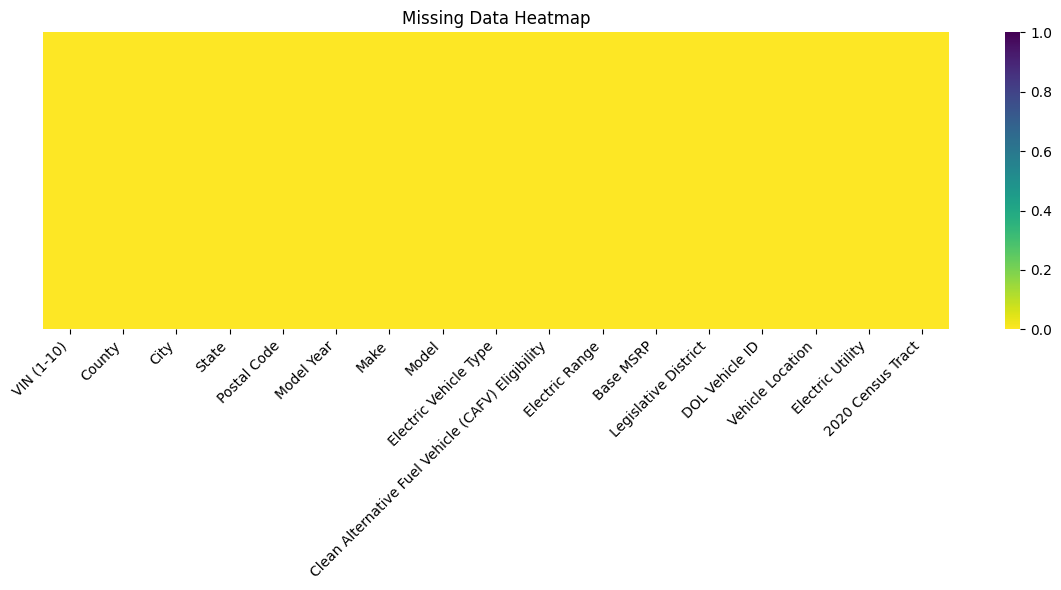

In [7]:
# Check for missing values
print("=== MISSING VALUES ANALYSIS ===")
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100

missing_summary = pd.DataFrame({
    'Column': df.columns,
    'Missing Count': missing_data,
    'Missing Percentage': missing_percent
}).sort_values('Missing Count', ascending=False)

print(missing_summary)

# Visualize missing data
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=True, cmap='viridis_r', yticklabels=False)
plt.title('Missing Data Heatmap')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [8]:
# Check for duplicates
print("=== DUPLICATE ANALYSIS ===")
total_duplicates = df.duplicated().sum()
print(f"Total duplicate rows: {total_duplicates:,}")
print(f"Percentage of duplicates: {(total_duplicates/len(df)*100):.2f}%")

# Check for duplicate VINs (should be unique identifiers)
vin_duplicates = df['VIN (1-10)'].duplicated().sum()
print(f"Duplicate VINs: {vin_duplicates:,}")

# Check unique values in key categorical columns
categorical_cols = ['State', 'Electric Vehicle Type', 'Make', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility']
print("\n=== UNIQUE VALUES IN KEY COLUMNS ===")
for col in categorical_cols:
    if col in df.columns:
        print(f"{col}: {df[col].nunique()} unique values")

=== DUPLICATE ANALYSIS ===
Total duplicate rows: 0
Percentage of duplicates: 0.00%
Duplicate VINs: 242,122

=== UNIQUE VALUES IN KEY COLUMNS ===
State: 50 unique values
Electric Vehicle Type: 2 unique values
Make: 46 unique values
Clean Alternative Fuel Vehicle (CAFV) Eligibility: 3 unique values


## 4. Data Cleaning and Preprocessing

In [9]:
# Create a working copy for analysis
df_clean = df.copy()

# Clean column names (remove special characters, standardize)
df_clean.columns = df_clean.columns.str.strip()

# Convert Model Year to numeric
df_clean['Model Year'] = pd.to_numeric(df_clean['Model Year'], errors='coerce')

# Convert Electric Range to numeric
df_clean['Electric Range'] = pd.to_numeric(df_clean['Electric Range'], errors='coerce')

# Convert Base MSRP to numeric
df_clean['Base MSRP'] = pd.to_numeric(df_clean['Base MSRP'], errors='coerce')

# Extract coordinates from Vehicle Location if available
if 'Vehicle Location' in df_clean.columns:
    # Extract latitude and longitude from POINT format
    def extract_coordinates(location_str):
        if pd.isna(location_str):
            return None, None
        try:
            # Extract coordinates from POINT (-122.68471 47.50524) format
            match = re.search(r'POINT \(([\-\d\.]+) ([\-\d\.]+)\)', str(location_str))
            if match:
                return float(match.group(1)), float(match.group(2))
        except:
            pass
        return None, None
    
    coords = df_clean['Vehicle Location'].apply(extract_coordinates)
    df_clean['Longitude'] = [coord[0] for coord in coords]
    df_clean['Latitude'] = [coord[1] for coord in coords]

print("Data cleaning completed!")
print(f"Cleaned dataset shape: {df_clean.shape}")

Data cleaning completed!
Cleaned dataset shape: (257635, 19)


In [10]:
# Create additional derived features
current_year = datetime.now().year
df_clean['Vehicle Age'] = current_year - df_clean['Model Year']

# Categorize electric range
def categorize_range(range_val):
    if pd.isna(range_val) or range_val == 0:
        return 'Unknown/Zero'
    elif range_val < 50:
        return 'Short Range (<50 miles)'
    elif range_val < 150:
        return 'Medium Range (50-149 miles)'
    elif range_val < 300:
        return 'Long Range (150-299 miles)'
    else:
        return 'Extended Range (300+ miles)'

df_clean['Range Category'] = df_clean['Electric Range'].apply(categorize_range)

# Categorize MSRP
def categorize_msrp(msrp):
    if pd.isna(msrp) or msrp == 0:
        return 'Unknown/Zero'
    elif msrp < 30000:
        return 'Budget (<$30K)'
    elif msrp < 50000:
        return 'Mid-range ($30K-$50K)'
    elif msrp < 80000:
        return 'Premium ($50K-$80K)'
    else:
        return 'Luxury ($80K+)'

df_clean['MSRP Category'] = df_clean['Base MSRP'].apply(categorize_msrp)

print("Feature engineering completed!")
print(f"New columns added: Vehicle Age, Range Category, MSRP Category")

Feature engineering completed!
New columns added: Vehicle Age, Range Category, MSRP Category


## 5. Electric Vehicle Type Analysis

=== ELECTRIC VEHICLE TYPE DISTRIBUTION ===
                                         Count  Percentage
Electric Vehicle Type                                     
Battery Electric Vehicle (BEV)          205095   79.606808
Plug-in Hybrid Electric Vehicle (PHEV)   52540   20.393192


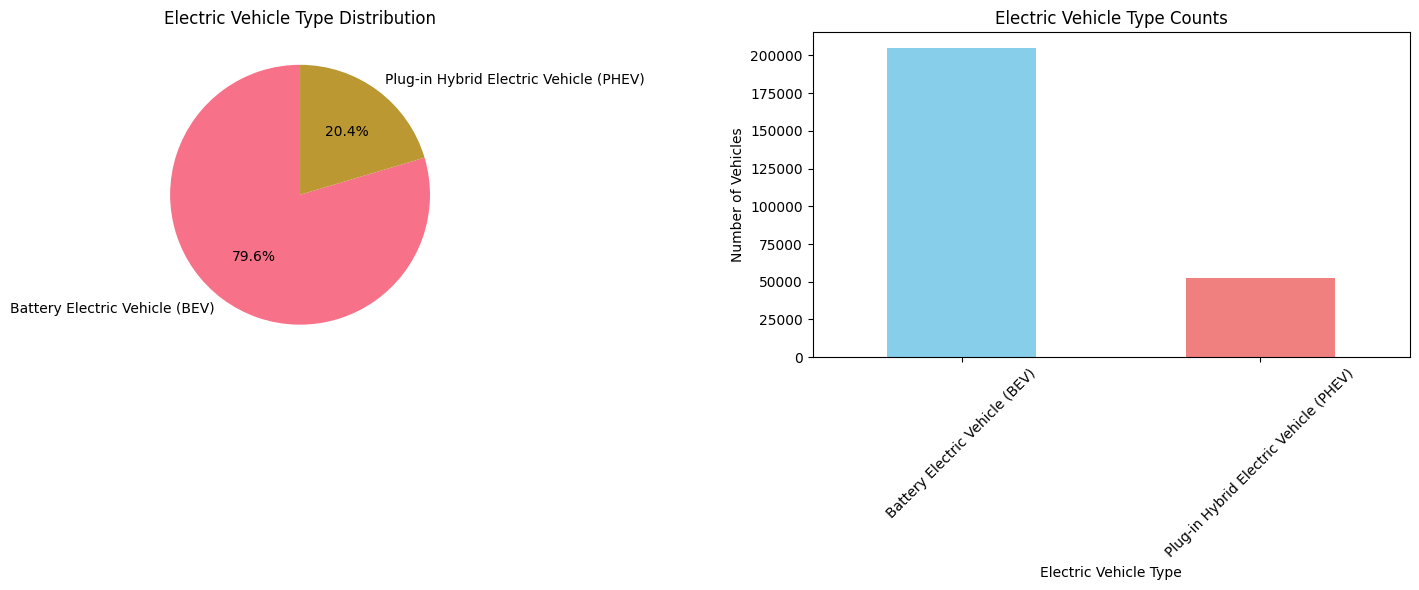

In [11]:
# Analyze Electric Vehicle Types
print("=== ELECTRIC VEHICLE TYPE DISTRIBUTION ===")
ev_type_counts = df_clean['Electric Vehicle Type'].value_counts()
ev_type_pct = df_clean['Electric Vehicle Type'].value_counts(normalize=True) * 100

ev_type_summary = pd.DataFrame({
    'Count': ev_type_counts,
    'Percentage': ev_type_pct
})
print(ev_type_summary)

# Visualize EV type distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Pie chart
ax1.pie(ev_type_counts.values, labels=ev_type_counts.index, autopct='%1.1f%%', startangle=90)
ax1.set_title('Electric Vehicle Type Distribution')

# Bar chart
ev_type_counts.plot(kind='bar', ax=ax2, color=['skyblue', 'lightcoral'])
ax2.set_title('Electric Vehicle Type Counts')
ax2.set_xlabel('Electric Vehicle Type')
ax2.set_ylabel('Number of Vehicles')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 6. Geographic Analysis

=== STATE DISTRIBUTION ===
State
WA    257038
CA       144
VA        73
TX        35
MD        34
FL        28
CO        24
TN        17
OR        16
IL        15
Name: count, dtype: int64

=== TOP 20 COUNTIES ===
County
King         128272
Snohomish     31810
Pierce        21314
Clark         15653
Thurston       9344
Kitsap         8651
Spokane        7247
Whatcom        6297
Benton         3469
Skagit         3015
Island         2831
Yakima         1724
Chelan         1601
Clallam        1558
Cowlitz        1343
Jefferson      1336
Mason          1266
San Juan       1217
Lewis          1136
Franklin       1042
Name: count, dtype: int64


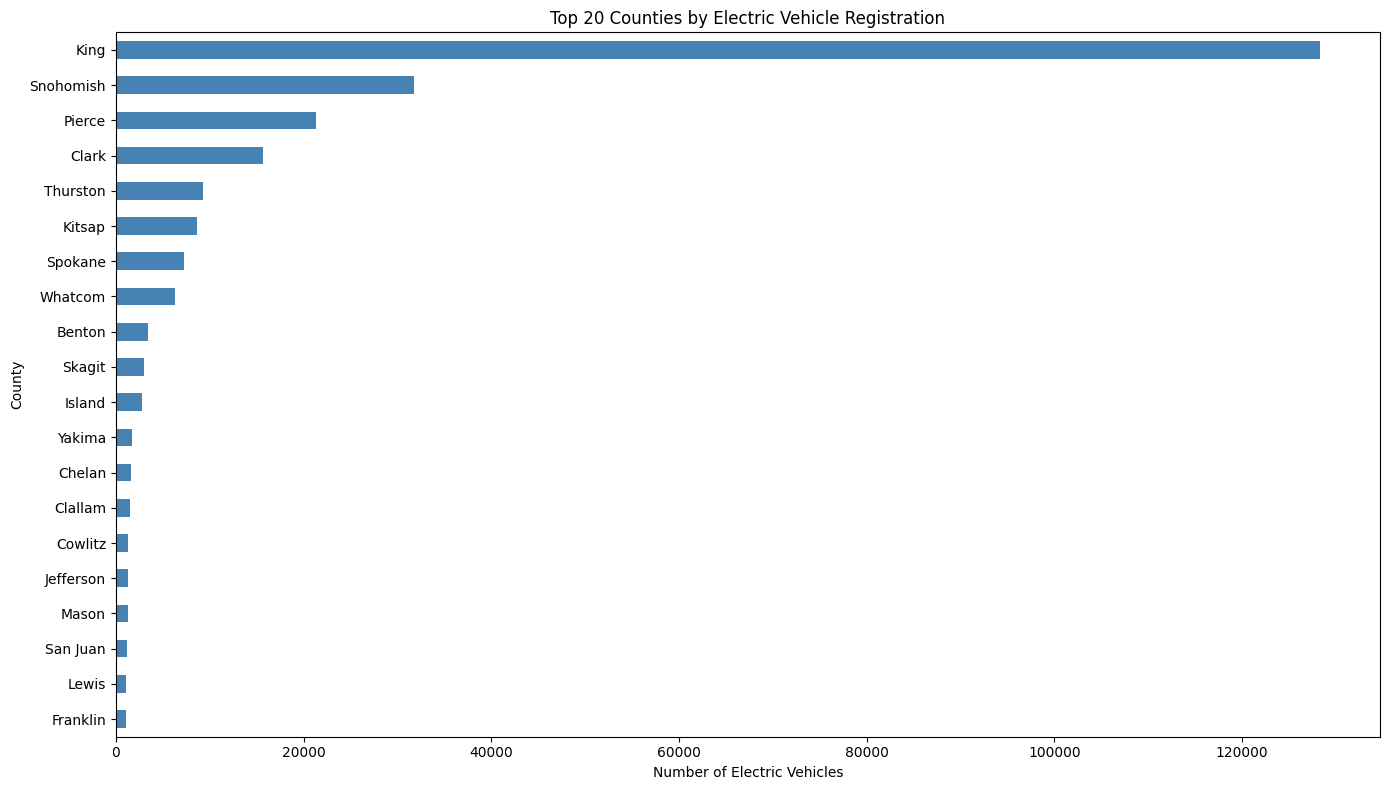

In [12]:
# State distribution
print("=== STATE DISTRIBUTION ===")
state_counts = df_clean['State'].value_counts()
print(state_counts.head(10))

# County analysis (top 20)
print("\n=== TOP 20 COUNTIES ===")
county_counts = df_clean['County'].value_counts().head(20)
print(county_counts)

# Visualize top counties
plt.figure(figsize=(14, 8))
county_counts.plot(kind='barh', color='steelblue')
plt.title('Top 20 Counties by Electric Vehicle Registration')
plt.xlabel('Number of Electric Vehicles')
plt.ylabel('County')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

=== TOP 20 CITIES ===
City
Seattle          40534
Bellevue         12513
Vancouver         9529
Redmond           8847
Bothell           8491
Kirkland          7330
Sammamish         7189
Renton            7038
Olympia           6057
Tacoma            5672
Kent              4411
Bellingham        4308
Spokane           4277
Lynnwood          4189
Everett           4048
Issaquah          3830
Woodinville       3121
Mercer Island     3045
Auburn            3014
Snohomish         2949
Name: count, dtype: int64


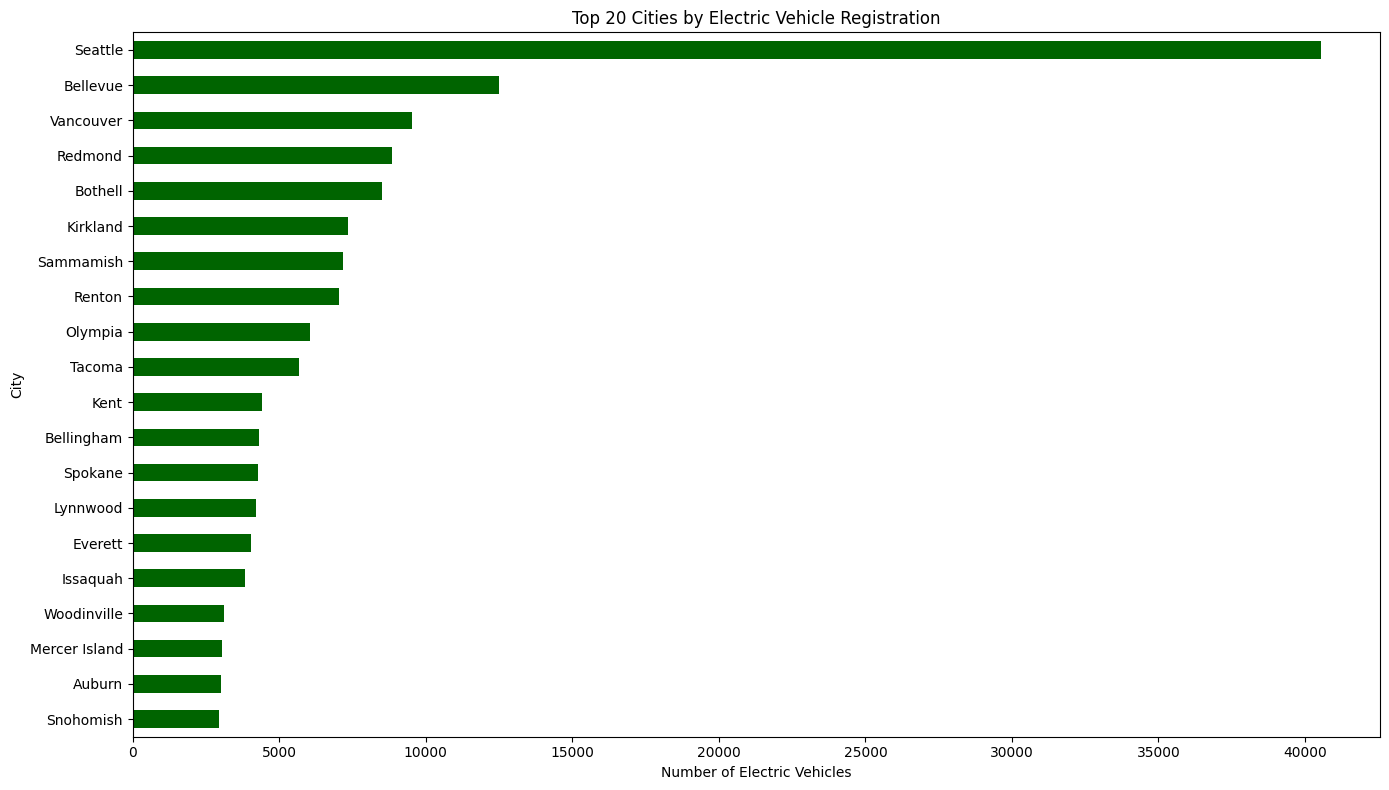

In [13]:
# City analysis (top 20)
print("=== TOP 20 CITIES ===")
city_counts = df_clean['City'].value_counts().head(20)
print(city_counts)

# Visualize top cities
plt.figure(figsize=(14, 8))
city_counts.plot(kind='barh', color='darkgreen')
plt.title('Top 20 Cities by Electric Vehicle Registration')
plt.xlabel('Number of Electric Vehicles')
plt.ylabel('City')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

Creating geographic visualization with 257,619 vehicles with coordinates...
Sampling 10,000 points for visualization performance


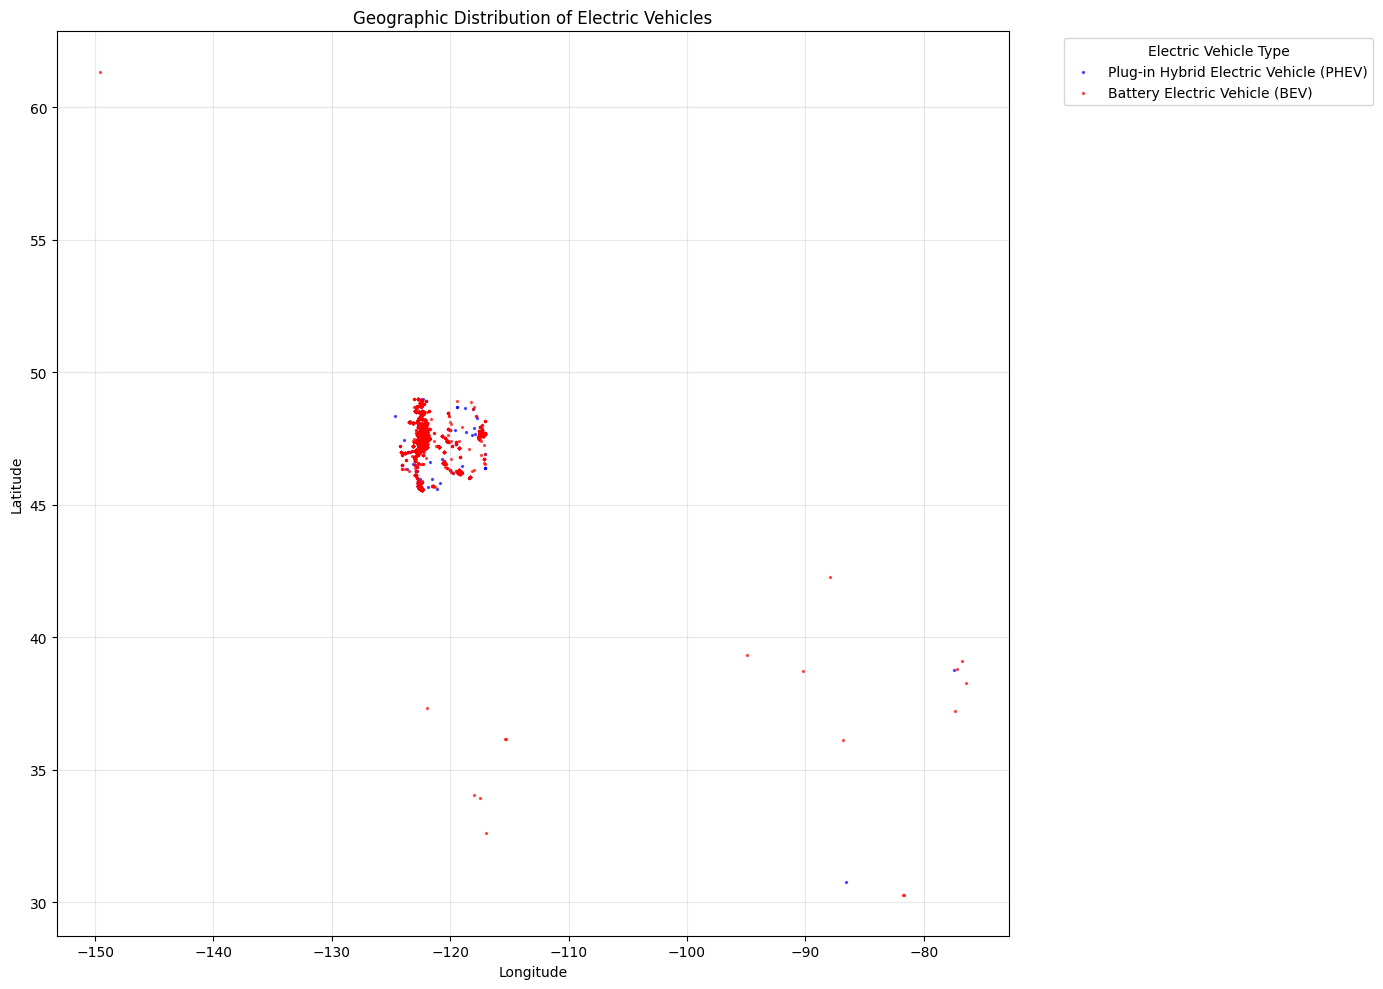

Geographic visualization completed with 10,000 data points


In [31]:
# Geographic scatter plot if coordinates are available
if 'Latitude' in df_clean.columns and 'Longitude' in df_clean.columns:
    # Remove rows with missing coordinates for visualization
    df_geo = df_clean.dropna(subset=['Latitude', 'Longitude'])
    
    if len(df_geo) > 0:
        print(f"Creating geographic visualization with {len(df_geo):,} vehicles with coordinates...")
        
        # Sample data for performance (if too large)
        if len(df_geo) > 10000:
            df_geo_sample = df_geo.sample(n=10000, random_state=42)
            print(f"Sampling {len(df_geo_sample):,} points for visualization performance")
        else:
            df_geo_sample = df_geo
        
        # Create geographic scatter plot using matplotlib
        plt.figure(figsize=(14, 10))
        
        # Create different colors for different EV types
        ev_types = df_geo_sample['Electric Vehicle Type'].unique()
        colors = ['blue', 'red', 'green', 'orange', 'purple']
        
        for i, ev_type in enumerate(ev_types):
            ev_data = df_geo_sample[df_geo_sample['Electric Vehicle Type'] == ev_type]
            plt.scatter(ev_data['Longitude'], ev_data['Latitude'], 
                       c=colors[i % len(colors)], alpha=0.6, s=2, label=ev_type)
        
        plt.xlabel('Longitude')
        plt.ylabel('Latitude')
        plt.title('Geographic Distribution of Electric Vehicles')
        plt.legend(title='Electric Vehicle Type', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
        
        print(f"Geographic visualization completed with {len(df_geo_sample):,} data points")
    else:
        print("No valid coordinate data available for geographic visualization")
else:
    print("Coordinate columns not found - skipping geographic visualization")

## 7. Temporal Analysis

=== MODEL YEAR ANALYSIS ===
Model Year distribution:
Model Year
2012     1446
2013     4091
2014     3323
2015     4596
2016     5269
2017     8775
2018    14548
2019    11058
2020    12348
2021    20858
2022    29519
2023    60042
2024    50817
2025    26389
2026     3867
Name: count, dtype: int64


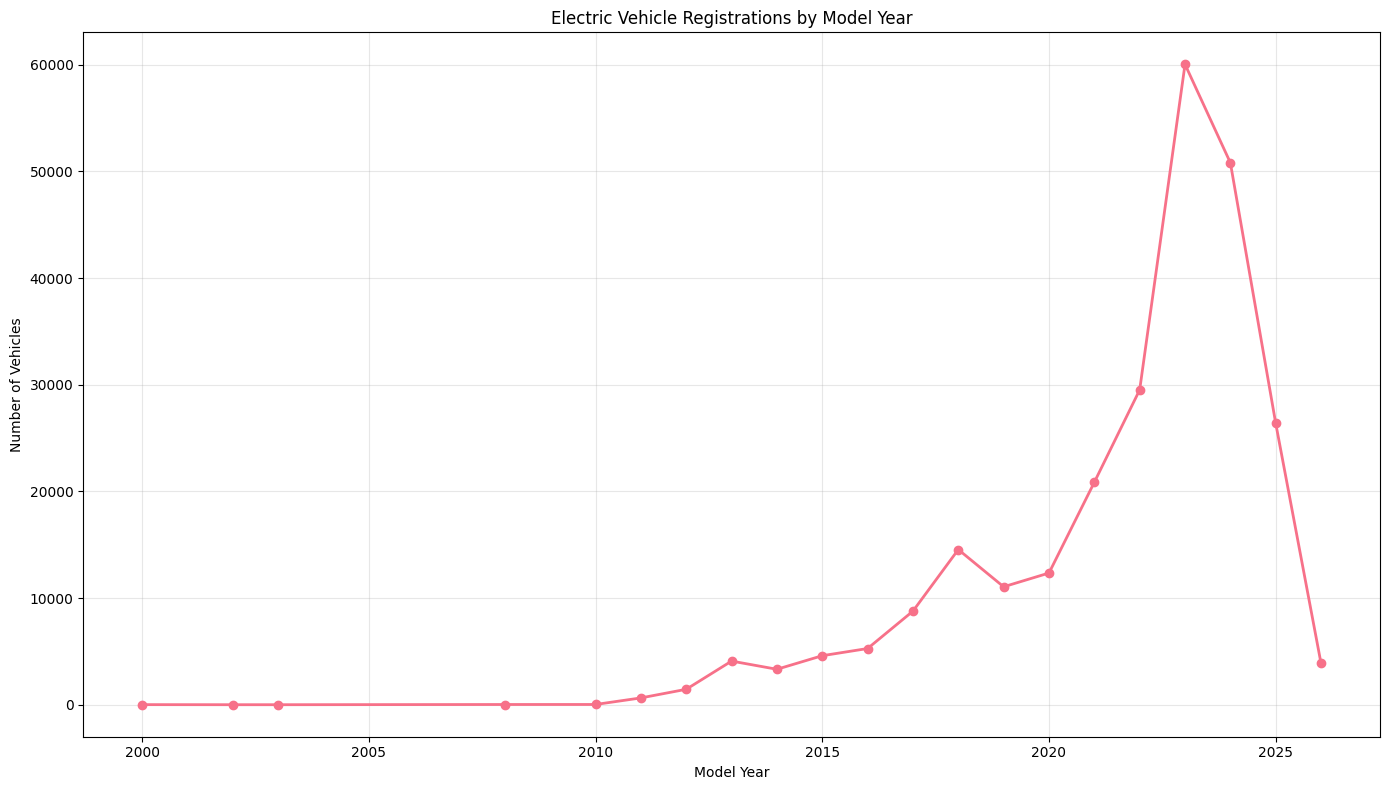


=== GROWTH ANALYSIS ===
Year-over-year growth rates (last 10 years):
2018: +65.8%
2019: -24.0%
2020: +11.7%
2021: +68.9%
2022: +41.5%
2023: +103.4%
2024: -15.4%
2025: -48.1%
2026: -85.3%


In [16]:
# Model Year distribution
print("=== MODEL YEAR ANALYSIS ===")
year_counts = df_clean['Model Year'].value_counts().sort_index()
print("Model Year distribution:")
print(year_counts.tail(15))  # Show recent years

# Visualize trend over time
plt.figure(figsize=(14, 8))
year_counts.plot(kind='line', marker='o', linewidth=2, markersize=6)
plt.title('Electric Vehicle Registrations by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Number of Vehicles')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Growth analysis
print("\n=== GROWTH ANALYSIS ===")
recent_years = year_counts.tail(10)
growth_rates = recent_years.pct_change() * 100
print("Year-over-year growth rates (last 10 years):")
for year, rate in growth_rates.items():
    if not pd.isna(rate):
        print(f"{year}: {rate:+.1f}%")

=== EV TYPE EVOLUTION OVER TIME ===


<Figure size 1400x800 with 0 Axes>

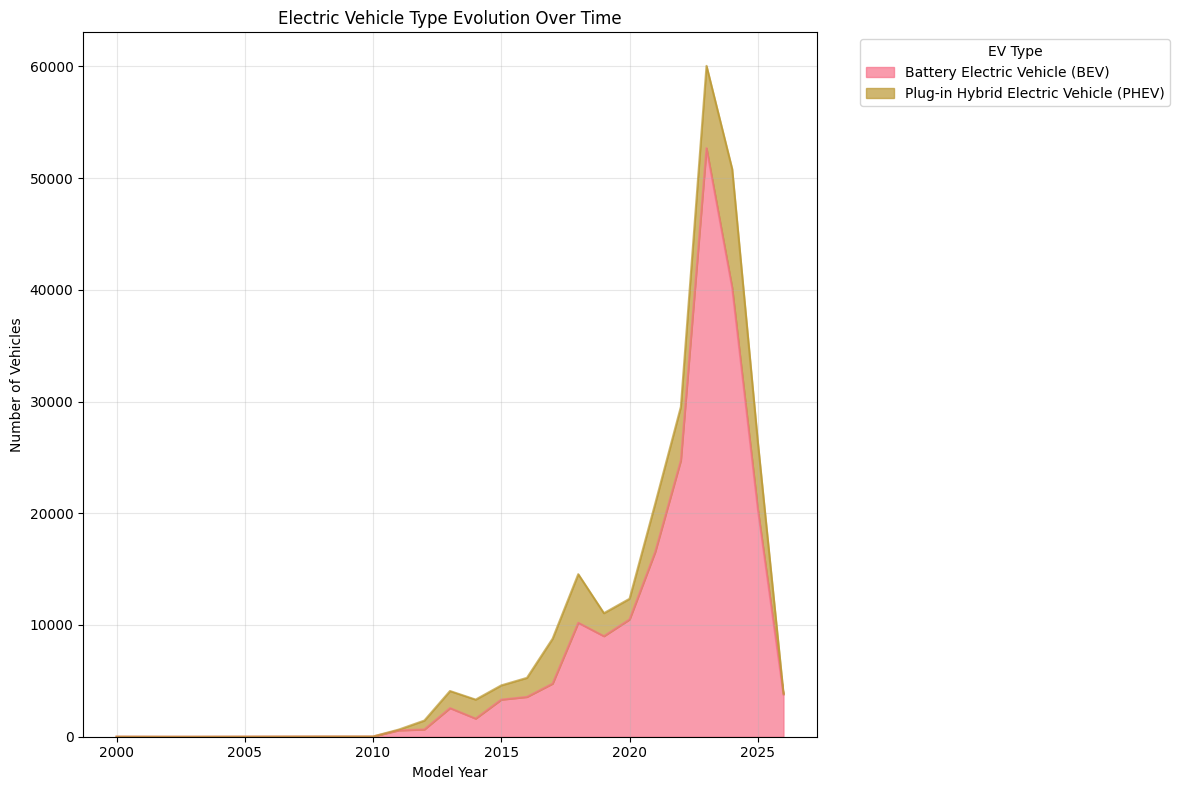

<Figure size 1400x800 with 0 Axes>

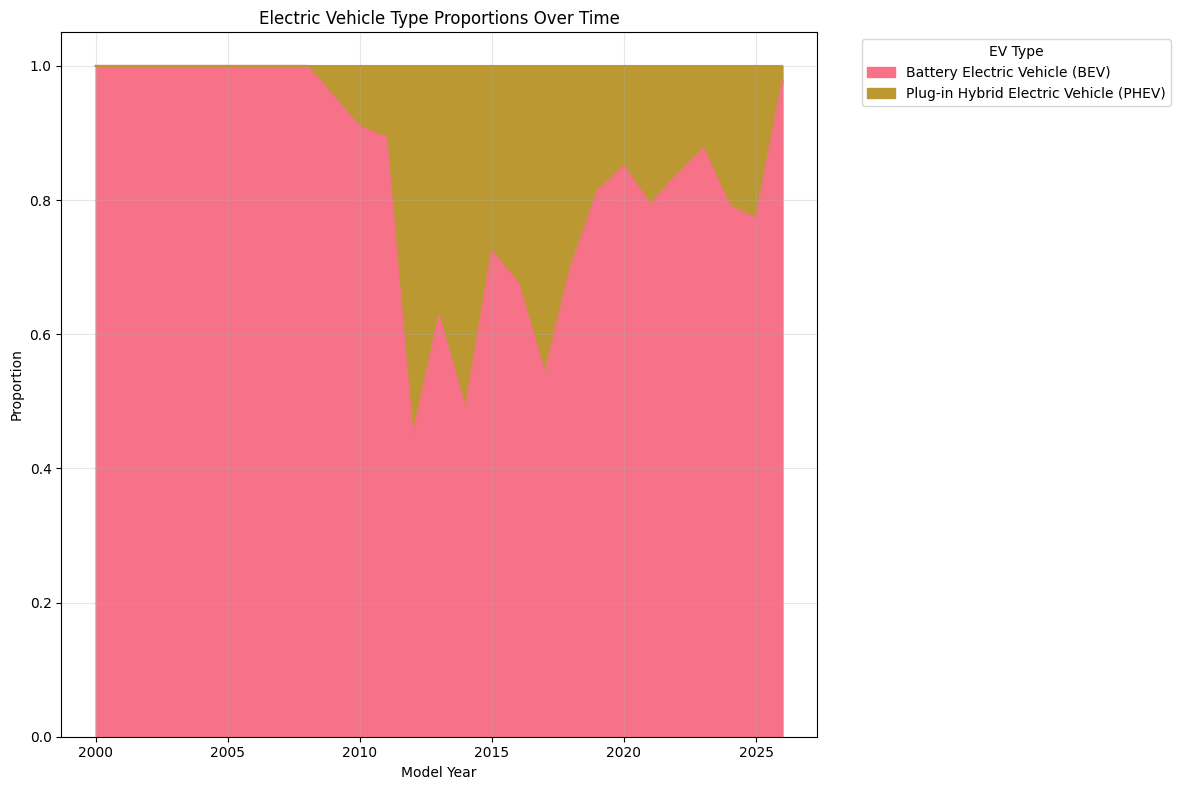

In [17]:
# EV type evolution over time
print("=== EV TYPE EVOLUTION OVER TIME ===")
ev_type_by_year = pd.crosstab(df_clean['Model Year'], df_clean['Electric Vehicle Type'])

# Plot stacked area chart
plt.figure(figsize=(14, 8))
ev_type_by_year.plot(kind='area', stacked=True, alpha=0.7)
plt.title('Electric Vehicle Type Evolution Over Time')
plt.xlabel('Model Year')
plt.ylabel('Number of Vehicles')
plt.legend(title='EV Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Calculate proportions
ev_type_proportions = ev_type_by_year.div(ev_type_by_year.sum(axis=1), axis=0)
plt.figure(figsize=(14, 8))
ev_type_proportions.plot(kind='area', stacked=True)
plt.title('Electric Vehicle Type Proportions Over Time')
plt.xlabel('Model Year')
plt.ylabel('Proportion')
plt.legend(title='EV Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 8. Vehicle Make and Model Analysis

=== TOP ELECTRIC VEHICLE MANUFACTURERS ===
Make
TESLA            107535
CHEVROLET         18602
NISSAN            16274
FORD              13750
KIA               12586
BMW               10656
TOYOTA            10622
HYUNDAI            8638
RIVIAN             7816
VOLVO              6673
VOLKSWAGEN         6607
JEEP               6599
AUDI               5190
CHRYSLER           3817
MERCEDES-BENZ      2918
Name: count, dtype: int64


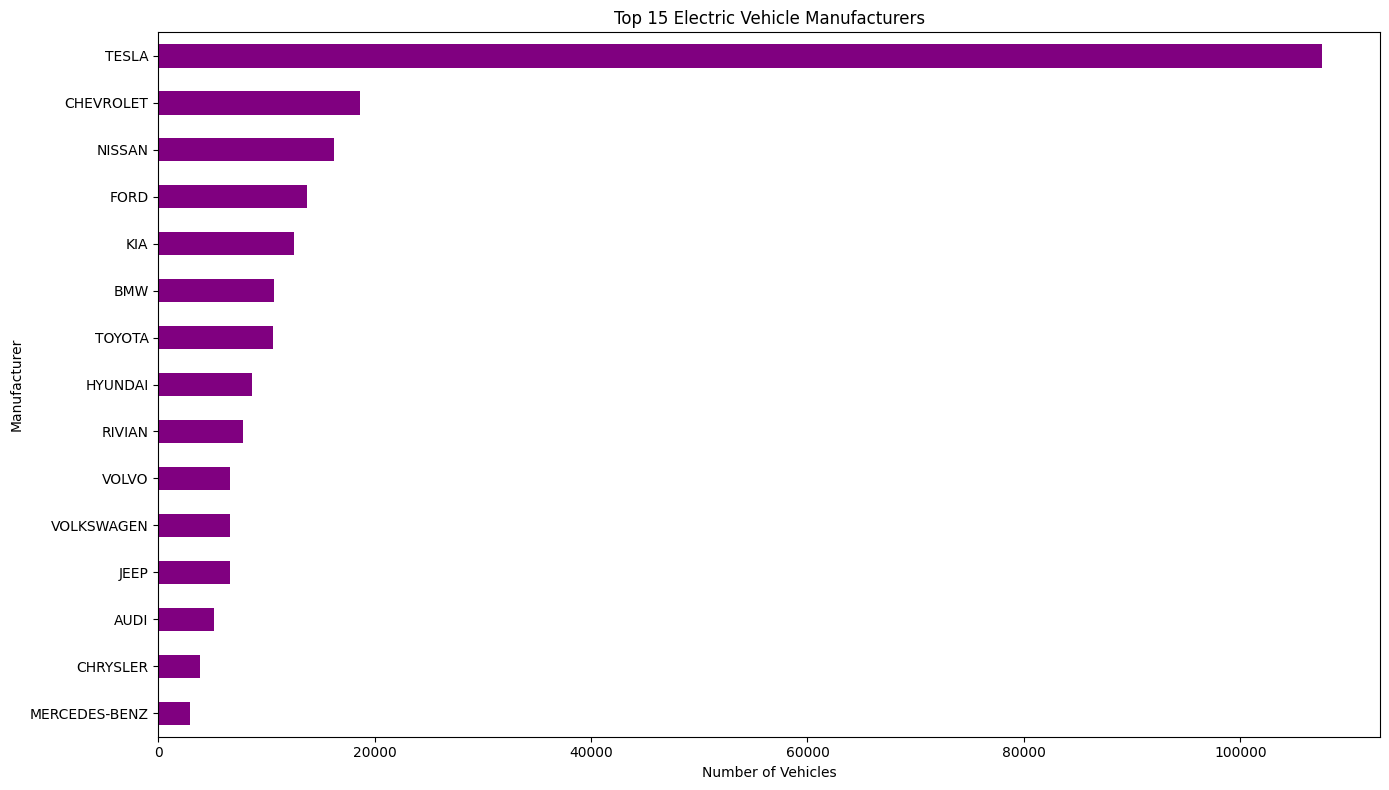


=== MARKET SHARE (TOP 15) ===
TESLA: 41.74%
CHEVROLET: 7.22%
NISSAN: 6.32%
FORD: 5.34%
KIA: 4.89%
BMW: 4.14%
TOYOTA: 4.12%
HYUNDAI: 3.35%
RIVIAN: 3.03%
VOLVO: 2.59%
VOLKSWAGEN: 2.56%
JEEP: 2.56%
AUDI: 2.01%
CHRYSLER: 1.48%
MERCEDES-BENZ: 1.13%


In [18]:
# Top manufacturers
print("=== TOP ELECTRIC VEHICLE MANUFACTURERS ===")
make_counts = df_clean['Make'].value_counts().head(15)
print(make_counts)

# Visualize top makes
plt.figure(figsize=(14, 8))
make_counts.plot(kind='barh', color='purple')
plt.title('Top 15 Electric Vehicle Manufacturers')
plt.xlabel('Number of Vehicles')
plt.ylabel('Manufacturer')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Market share analysis
total_vehicles = len(df_clean)
make_market_share = (make_counts / total_vehicles * 100).round(2)
print("\n=== MARKET SHARE (TOP 15) ===")
for make, share in make_market_share.items():
    print(f"{make}: {share}%")

=== TOP ELECTRIC VEHICLE MODELS ===
Model
MODEL Y               53560
MODEL 3               37807
LEAF                  13971
MODEL S                7911
BOLT EV                7812
MODEL X                6713
MUSTANG MACH-E         5597
ID.4                   5338
IONIQ 5                4833
WRANGLER               4831
VOLT                   4634
R1S                    4341
NIRO                   4283
RAV4 PRIME (PHEV)      4214
PACIFICA               3817
PRIUS PRIME (PHEV)     3742
EV6                    3637
F-150                  3531
X5                     3289
BOLT EUV               2906
Name: count, dtype: int64


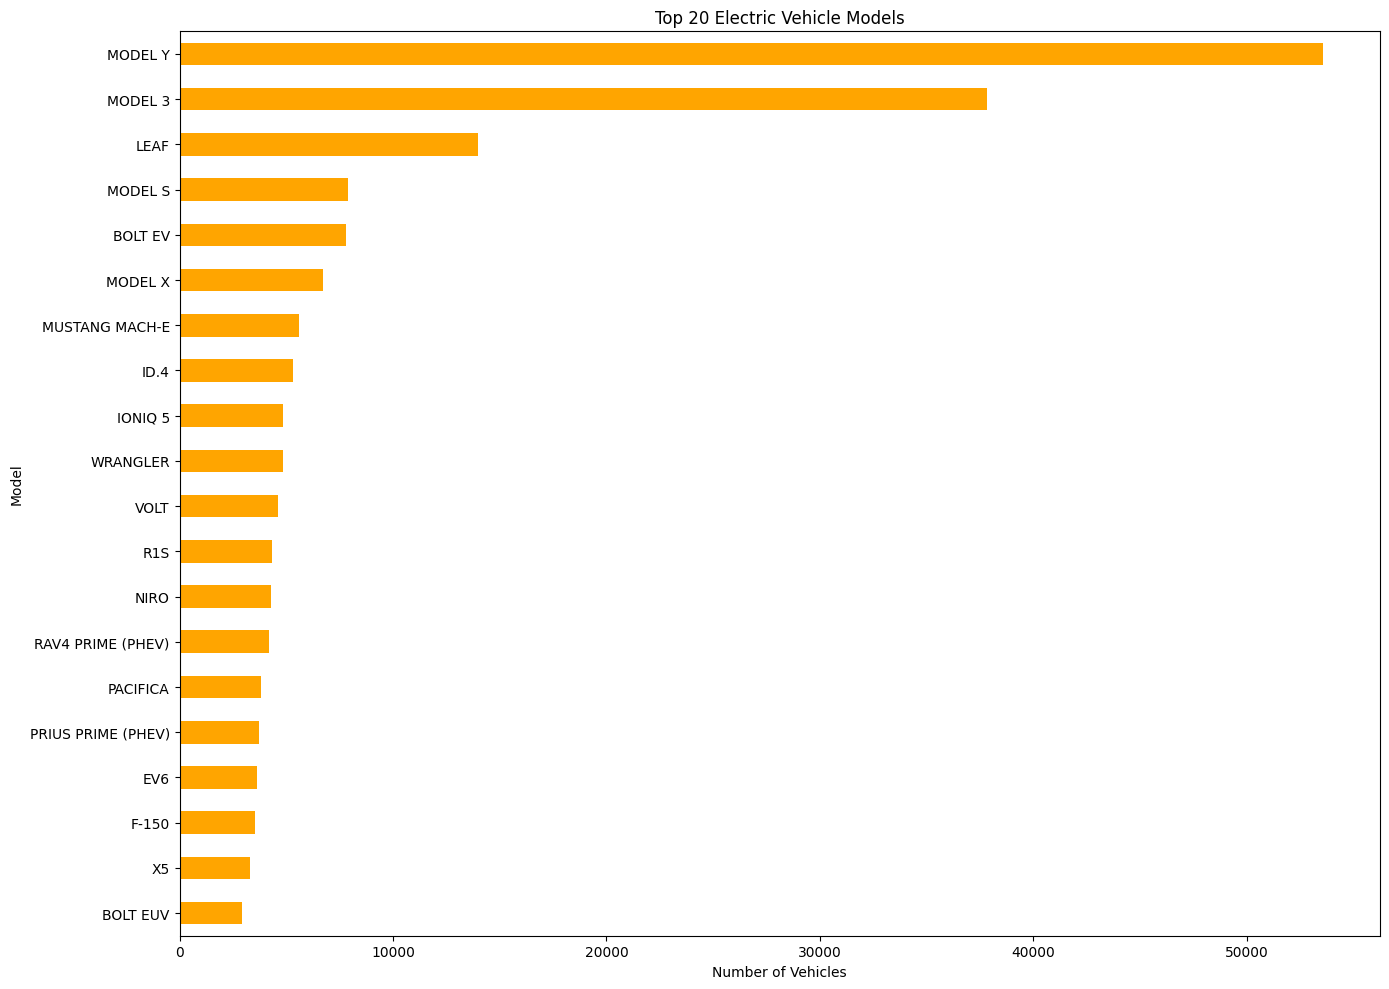

In [19]:
# Top models overall
print("=== TOP ELECTRIC VEHICLE MODELS ===")
model_counts = df_clean['Model'].value_counts().head(20)
print(model_counts)

# Visualize top models
plt.figure(figsize=(14, 10))
model_counts.plot(kind='barh', color='orange')
plt.title('Top 20 Electric Vehicle Models')
plt.xlabel('Number of Vehicles')
plt.ylabel('Model')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

=== MANUFACTURER EV TYPE PREFERENCES ===


<Figure size 1400x800 with 0 Axes>

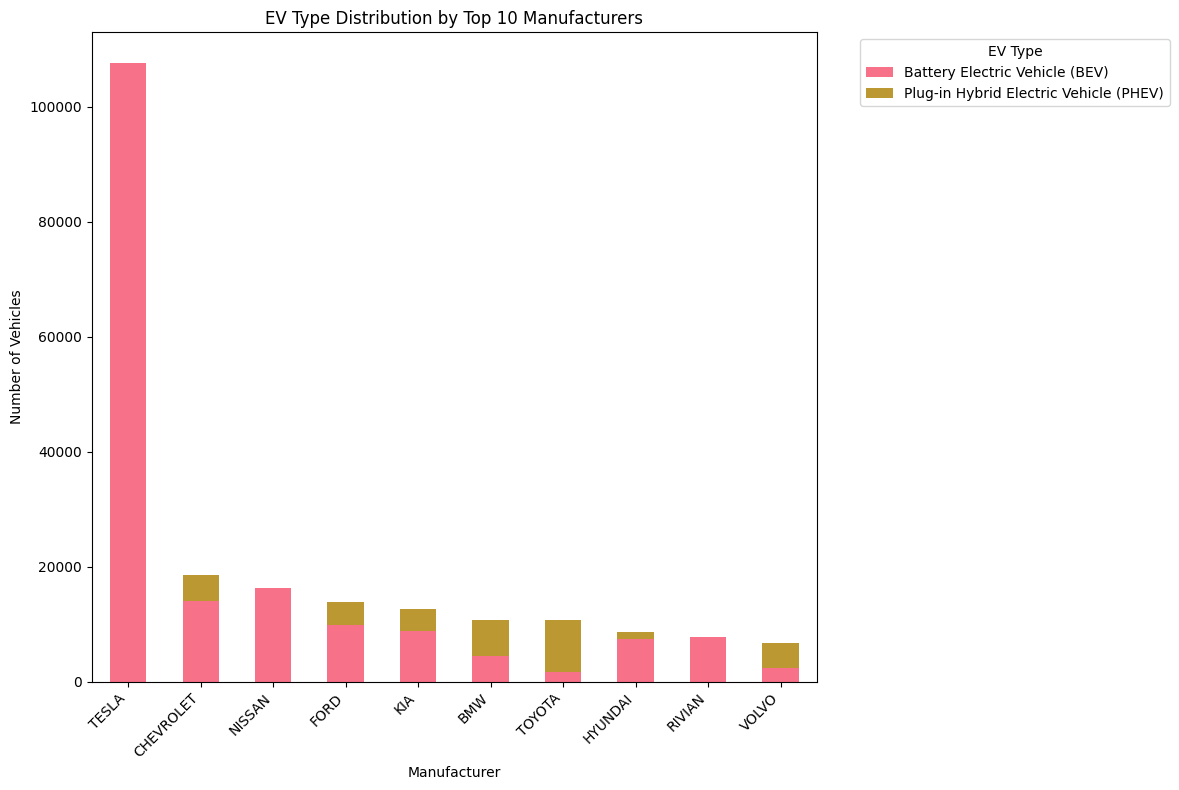

<Figure size 1400x800 with 0 Axes>

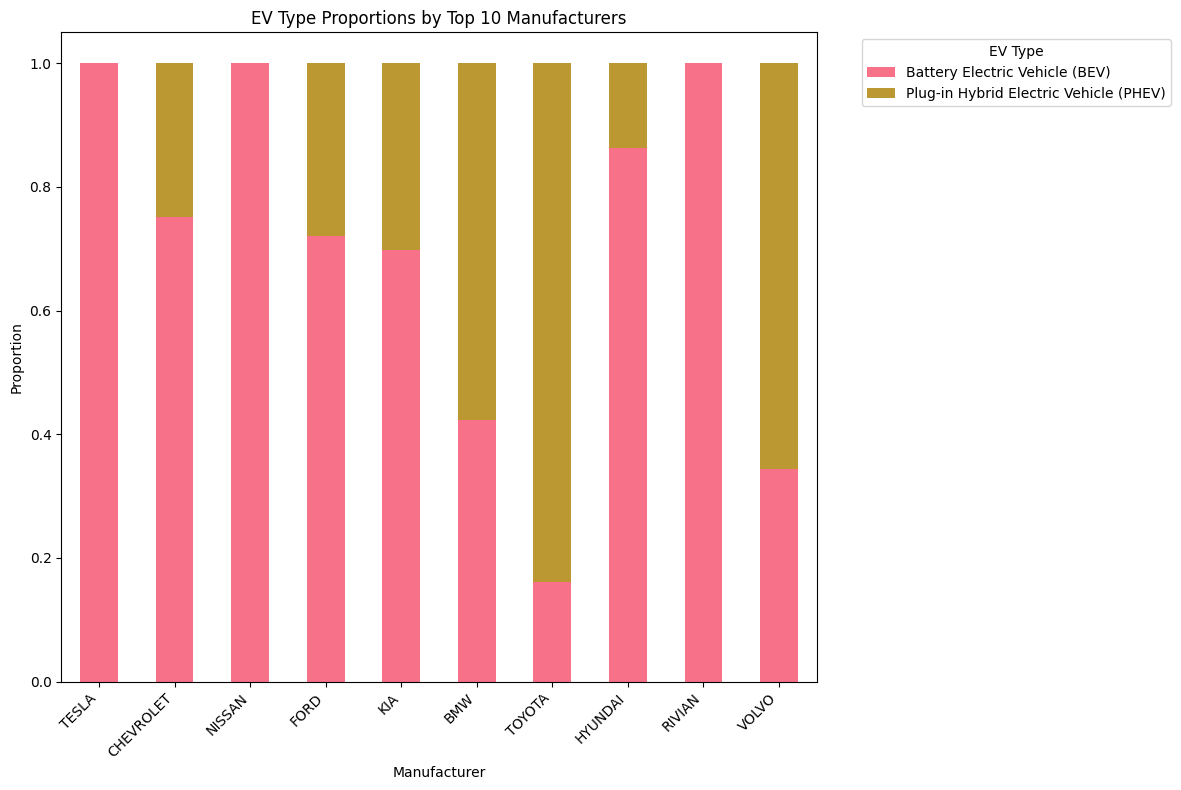

In [20]:
# Make vs EV Type analysis
print("=== MANUFACTURER EV TYPE PREFERENCES ===")
make_ev_type = pd.crosstab(df_clean['Make'], df_clean['Electric Vehicle Type'])
make_ev_type_top = make_ev_type.loc[make_counts.head(10).index]

# Stacked bar chart
plt.figure(figsize=(14, 8))
make_ev_type_top.plot(kind='bar', stacked=True)
plt.title('EV Type Distribution by Top 10 Manufacturers')
plt.xlabel('Manufacturer')
plt.ylabel('Number of Vehicles')
plt.legend(title='EV Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Proportional view
make_ev_type_prop = make_ev_type_top.div(make_ev_type_top.sum(axis=1), axis=0)
plt.figure(figsize=(14, 8))
make_ev_type_prop.plot(kind='bar', stacked=True)
plt.title('EV Type Proportions by Top 10 Manufacturers')
plt.xlabel('Manufacturer')
plt.ylabel('Proportion')
plt.legend(title='EV Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 9. Electric Range Analysis

=== ELECTRIC RANGE ANALYSIS ===
Electric Range Statistics:
count    257632.000000
mean         43.127775
std          81.632805
min           0.000000
25%           0.000000
50%           0.000000
75%          35.000000
max         337.000000
Name: Electric Range, dtype: float64

=== RANGE BY EV TYPE ===
                                           count       mean        std  min  \
Electric Vehicle Type                                                         
Battery Electric Vehicle (BEV)          205095.0  46.117350  90.965482  0.0   
Plug-in Hybrid Electric Vehicle (PHEV)   52537.0  31.457011  14.302531  1.0   

                                         25%   50%   75%    max  
Electric Vehicle Type                                            
Battery Electric Vehicle (BEV)           0.0   0.0   0.0  337.0  
Plug-in Hybrid Electric Vehicle (PHEV)  21.0  32.0  38.0  153.0  


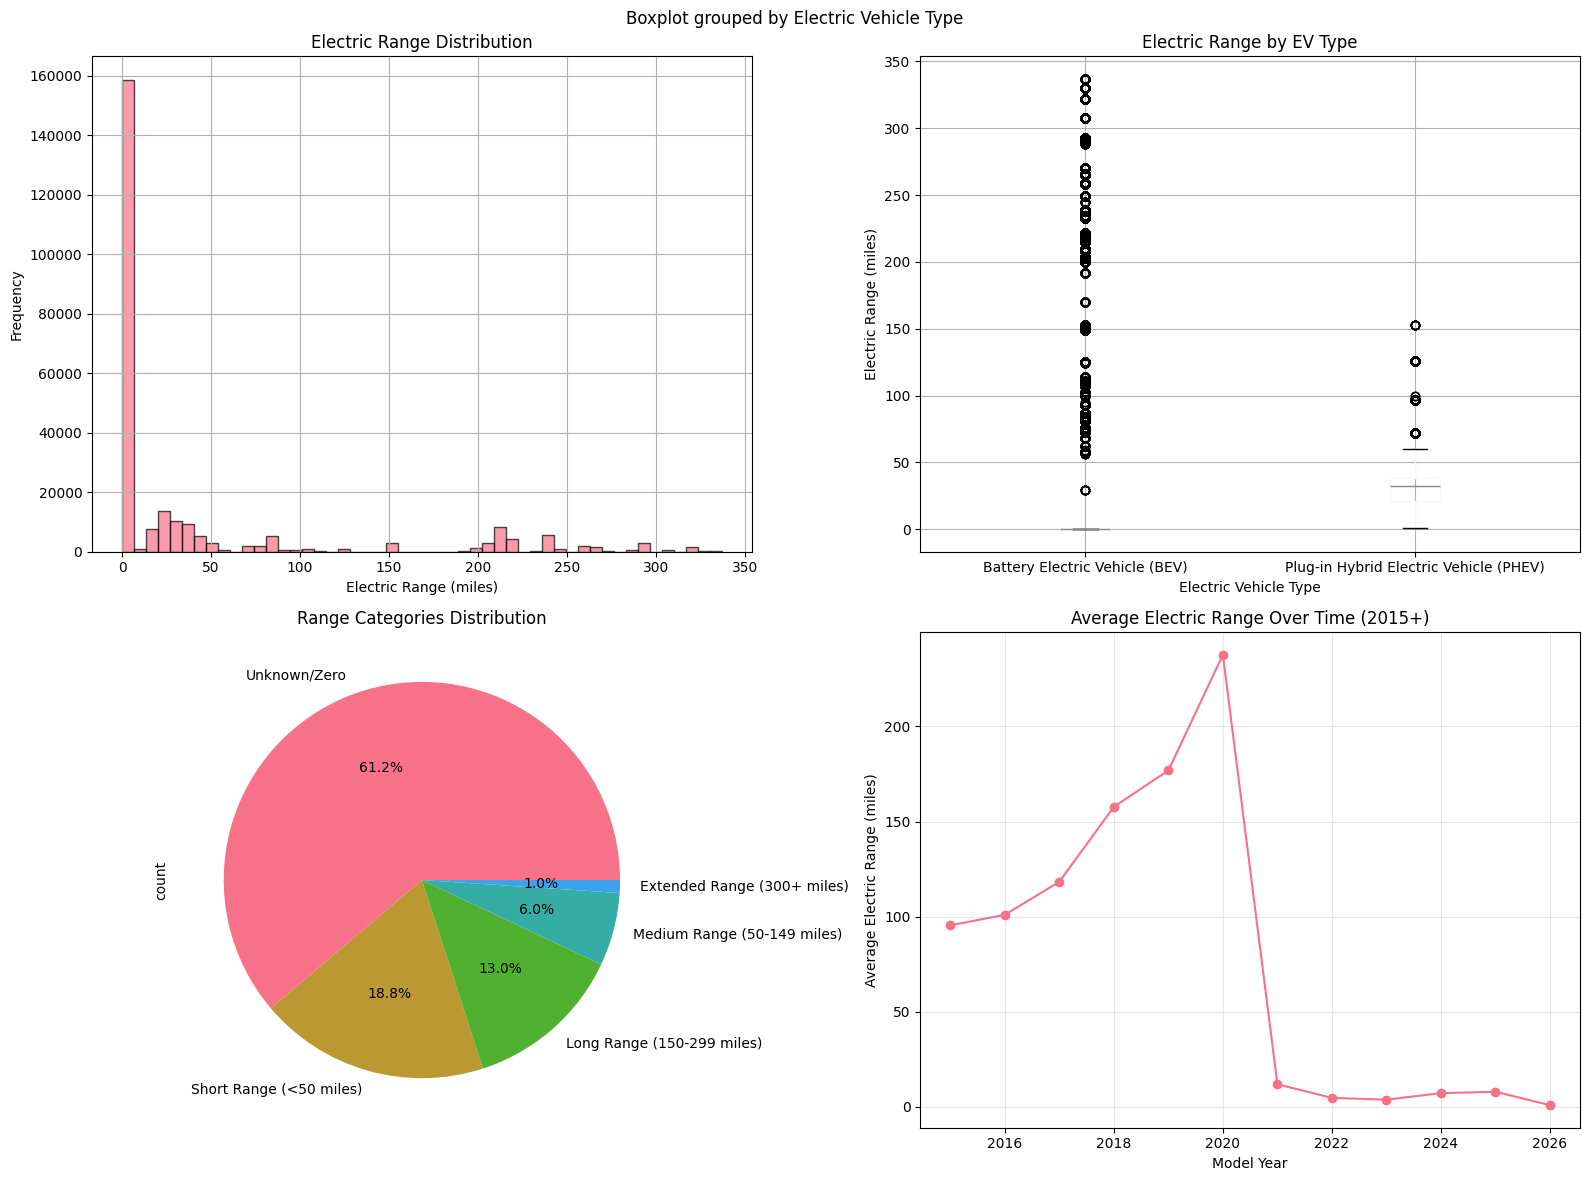

In [21]:
# Electric Range statistics
print("=== ELECTRIC RANGE ANALYSIS ===")
range_stats = df_clean['Electric Range'].describe()
print("Electric Range Statistics:")
print(range_stats)

# Range by EV type
print("\n=== RANGE BY EV TYPE ===")
range_by_type = df_clean.groupby('Electric Vehicle Type')['Electric Range'].describe()
print(range_by_type)

# Visualize range distribution
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Histogram
df_clean['Electric Range'].hist(bins=50, ax=ax1, edgecolor='black', alpha=0.7)
ax1.set_title('Electric Range Distribution')
ax1.set_xlabel('Electric Range (miles)')
ax1.set_ylabel('Frequency')

# Box plot by EV type
df_clean.boxplot(column='Electric Range', by='Electric Vehicle Type', ax=ax2)
ax2.set_title('Electric Range by EV Type')
ax2.set_xlabel('Electric Vehicle Type')
ax2.set_ylabel('Electric Range (miles)')

# Range categories
range_cat_counts = df_clean['Range Category'].value_counts()
range_cat_counts.plot(kind='pie', ax=ax3, autopct='%1.1f%%')
ax3.set_title('Range Categories Distribution')

# Range over time (recent years)
recent_years_range = df_clean[df_clean['Model Year'] >= 2015].groupby('Model Year')['Electric Range'].mean()
recent_years_range.plot(kind='line', marker='o', ax=ax4)
ax4.set_title('Average Electric Range Over Time (2015+)')
ax4.set_xlabel('Model Year')
ax4.set_ylabel('Average Electric Range (miles)')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 10. Pricing Analysis (MSRP)

=== BASE MSRP ANALYSIS ===
Records with MSRP > 0: 3,178 (1.2%)

MSRP Statistics (excluding zero values):
count      3178.000000
mean      57174.405286
std       27220.164612
min       31950.000000
25%       39995.000000
50%       57800.000000
75%       69900.000000
max      845000.000000
Name: Base MSRP, dtype: float64

=== MSRP BY EV TYPE ===
                                         count          mean           std  \
Electric Vehicle Type                                                        
Battery Electric Vehicle (BEV)          1969.0  59681.564246  18107.489871   
Plug-in Hybrid Electric Vehicle (PHEV)  1209.0  53091.199338  37249.759409   

                                            min      25%      50%      75%  \
Electric Vehicle Type                                                        
Battery Electric Vehicle (BEV)          31950.0  33950.0  69900.0  69900.0   
Plug-in Hybrid Electric Vehicle (PHEV)  32995.0  39995.0  52650.0  54950.0   

                            

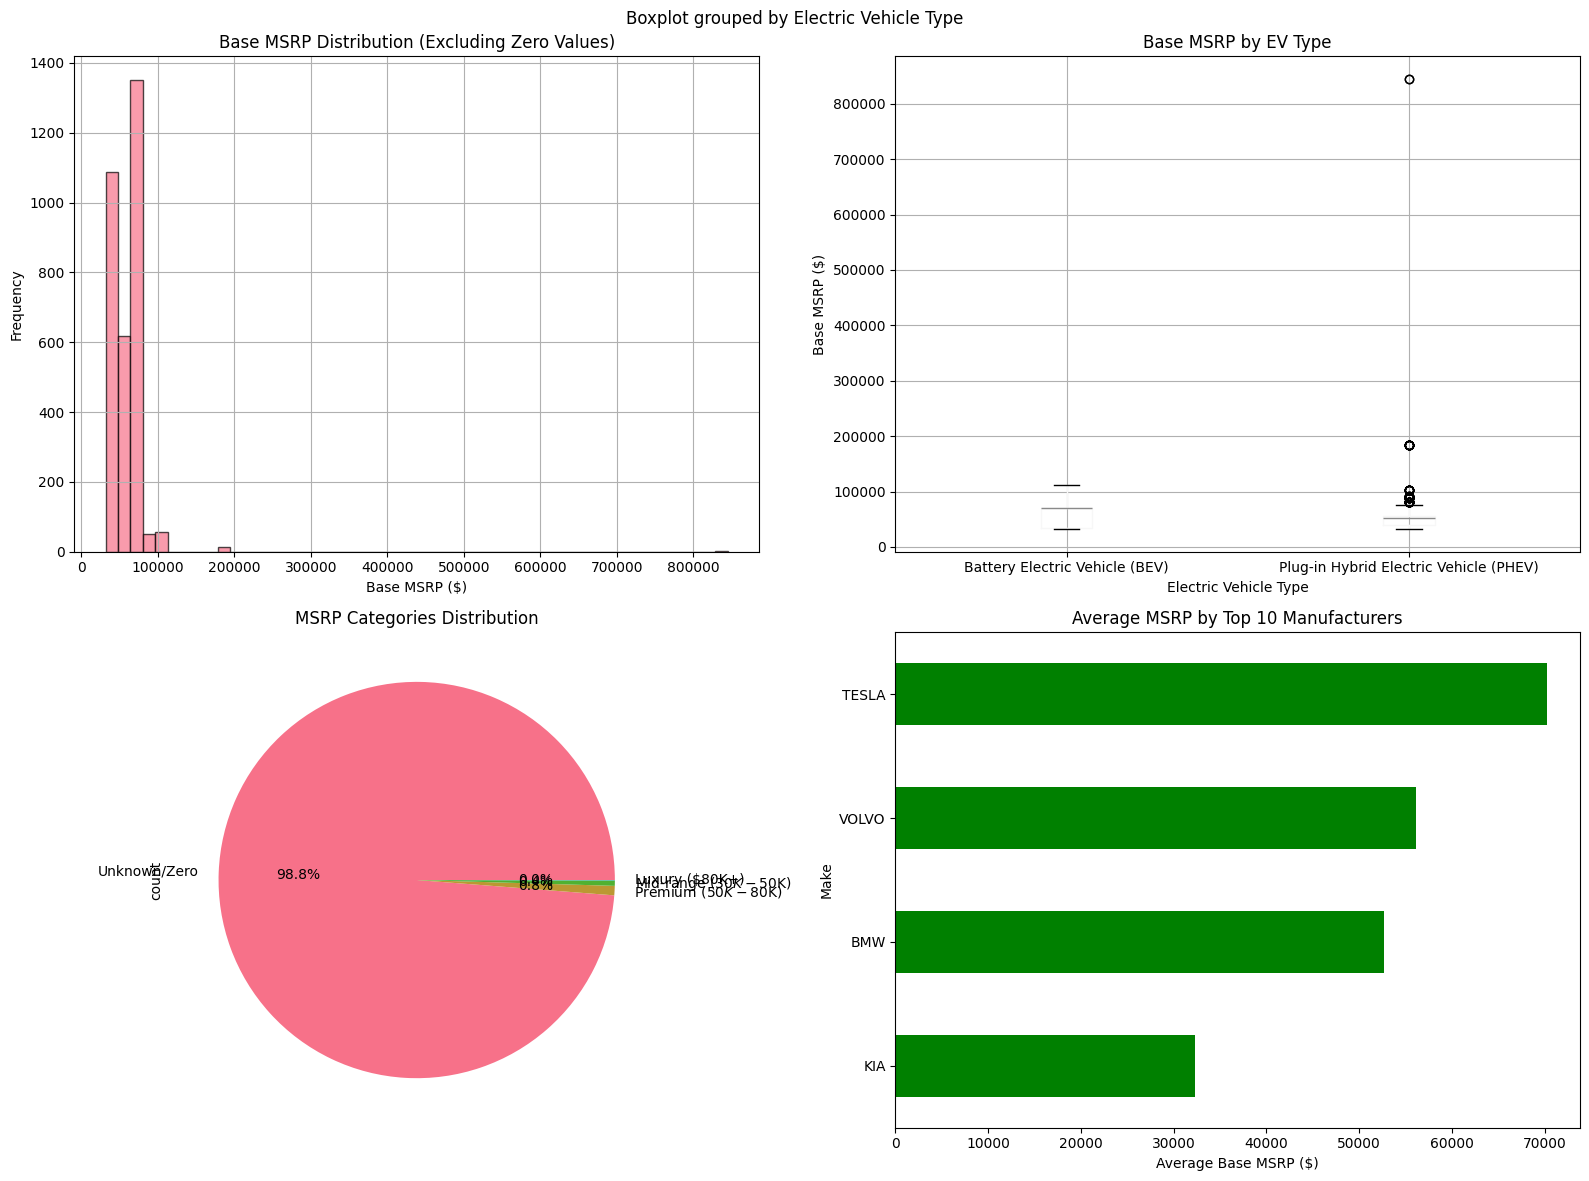

In [22]:
# MSRP statistics (excluding zero values)
print("=== BASE MSRP ANALYSIS ===")
msrp_nonzero = df_clean[df_clean['Base MSRP'] > 0]['Base MSRP']
print(f"Records with MSRP > 0: {len(msrp_nonzero):,} ({len(msrp_nonzero)/len(df_clean)*100:.1f}%)")
print("\nMSRP Statistics (excluding zero values):")
print(msrp_nonzero.describe())

# MSRP by EV type
print("\n=== MSRP BY EV TYPE ===")
msrp_by_type = df_clean[df_clean['Base MSRP'] > 0].groupby('Electric Vehicle Type')['Base MSRP'].describe()
print(msrp_by_type)

# Visualize MSRP analysis
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# MSRP histogram (excluding zeros)
msrp_nonzero.hist(bins=50, ax=ax1, edgecolor='black', alpha=0.7)
ax1.set_title('Base MSRP Distribution (Excluding Zero Values)')
ax1.set_xlabel('Base MSRP ($)')
ax1.set_ylabel('Frequency')

# Box plot by EV type
df_clean[df_clean['Base MSRP'] > 0].boxplot(column='Base MSRP', by='Electric Vehicle Type', ax=ax2)
ax2.set_title('Base MSRP by EV Type')
ax2.set_xlabel('Electric Vehicle Type')
ax2.set_ylabel('Base MSRP ($)')

# MSRP categories
msrp_cat_counts = df_clean['MSRP Category'].value_counts()
msrp_cat_counts.plot(kind='pie', ax=ax3, autopct='%1.1f%%')
ax3.set_title('MSRP Categories Distribution')

# Average MSRP by top manufacturers
top_makes = make_counts.head(10).index
avg_msrp_by_make = df_clean[df_clean['Make'].isin(top_makes) & (df_clean['Base MSRP'] > 0)].groupby('Make')['Base MSRP'].mean().sort_values(ascending=True)
avg_msrp_by_make.plot(kind='barh', ax=ax4, color='green')
ax4.set_title('Average MSRP by Top 10 Manufacturers')
ax4.set_xlabel('Average Base MSRP ($)')

plt.tight_layout()
plt.show()

## 11. CAFV Eligibility Analysis

=== CLEAN ALTERNATIVE FUEL VEHICLE (CAFV) ELIGIBILITY ===
                                                     Count  Percentage
Clean Alternative Fuel Vehicle (CAFV) Eligibility                     
Eligibility unknown as battery range has not be...  157670   61.198983
Clean Alternative Fuel Vehicle Eligible              76157   29.560036
Not eligible due to low battery range                23808    9.240980


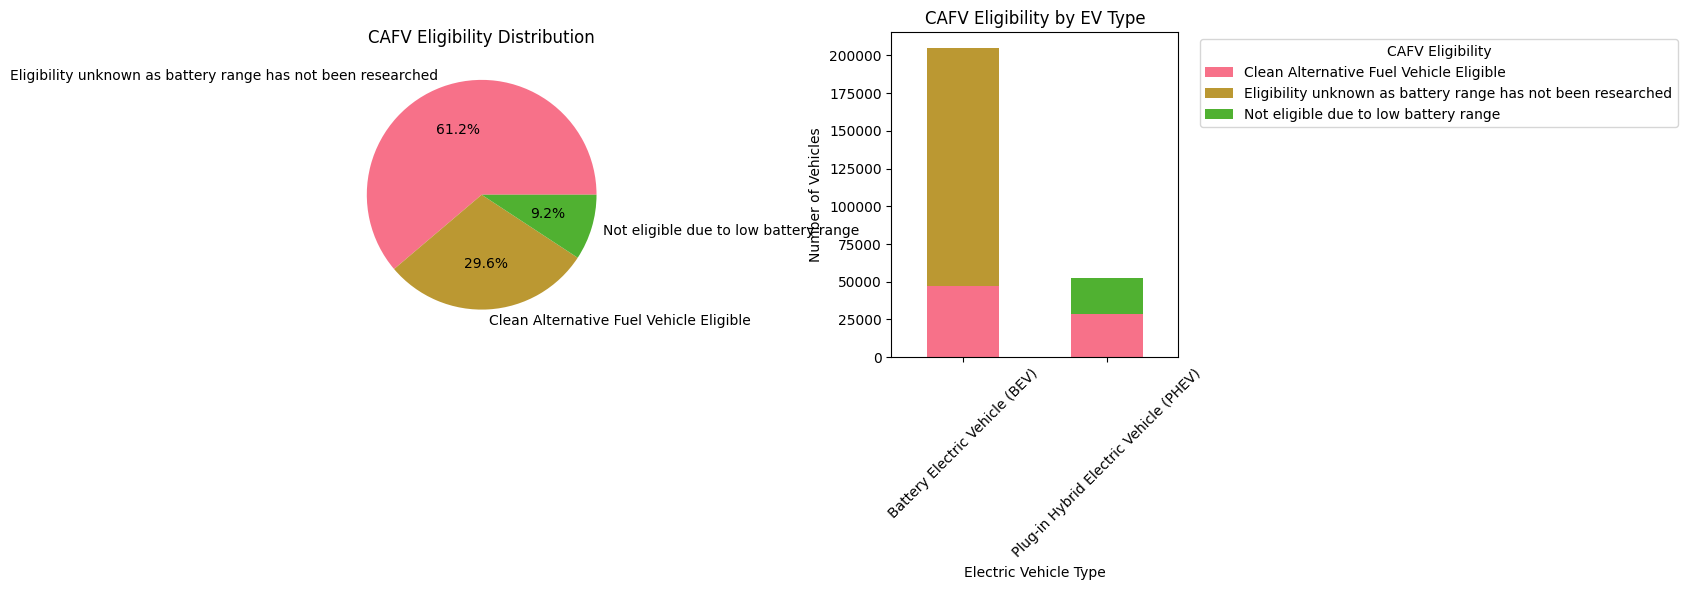

In [23]:
# CAFV Eligibility analysis
print("=== CLEAN ALTERNATIVE FUEL VEHICLE (CAFV) ELIGIBILITY ===")
cafv_counts = df_clean['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()
cafv_pct = df_clean['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts(normalize=True) * 100

cafv_summary = pd.DataFrame({
    'Count': cafv_counts,
    'Percentage': cafv_pct
})
print(cafv_summary)

# Visualize CAFV eligibility
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Pie chart
cafv_counts.plot(kind='pie', ax=ax1, autopct='%1.1f%%')
ax1.set_title('CAFV Eligibility Distribution')
ax1.set_ylabel('')

# CAFV by EV type
cafv_by_type = pd.crosstab(df_clean['Electric Vehicle Type'], df_clean['Clean Alternative Fuel Vehicle (CAFV) Eligibility'])
cafv_by_type.plot(kind='bar', ax=ax2, stacked=True)
ax2.set_title('CAFV Eligibility by EV Type')
ax2.set_xlabel('Electric Vehicle Type')
ax2.set_ylabel('Number of Vehicles')
ax2.legend(title='CAFV Eligibility', bbox_to_anchor=(1.05, 1), loc='upper left')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 12. Electric Utility Analysis

=== ELECTRIC UTILITY ANALYSIS ===
Top 15 Electric Utilities:
Electric Utility
PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)                                            92161
PUGET SOUND ENERGY INC                                                                   53830
CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)                                             43493
BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF CLARK COUNTY - (WA)                         15270
BONNEVILLE POWER ADMINISTRATION||CITY OF TACOMA - (WA)||PENINSULA LIGHT COMPANY          11815
PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM COUNTY                                        5960
BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||INLAND POWER & LIGHT COMPANY                4432
BONNEVILLE POWER ADMINISTRATION||PUD 1 OF SNOHOMISH COUNTY                                2367
PACIFICORP                                                                                2189
BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF BENTON COUNTY         

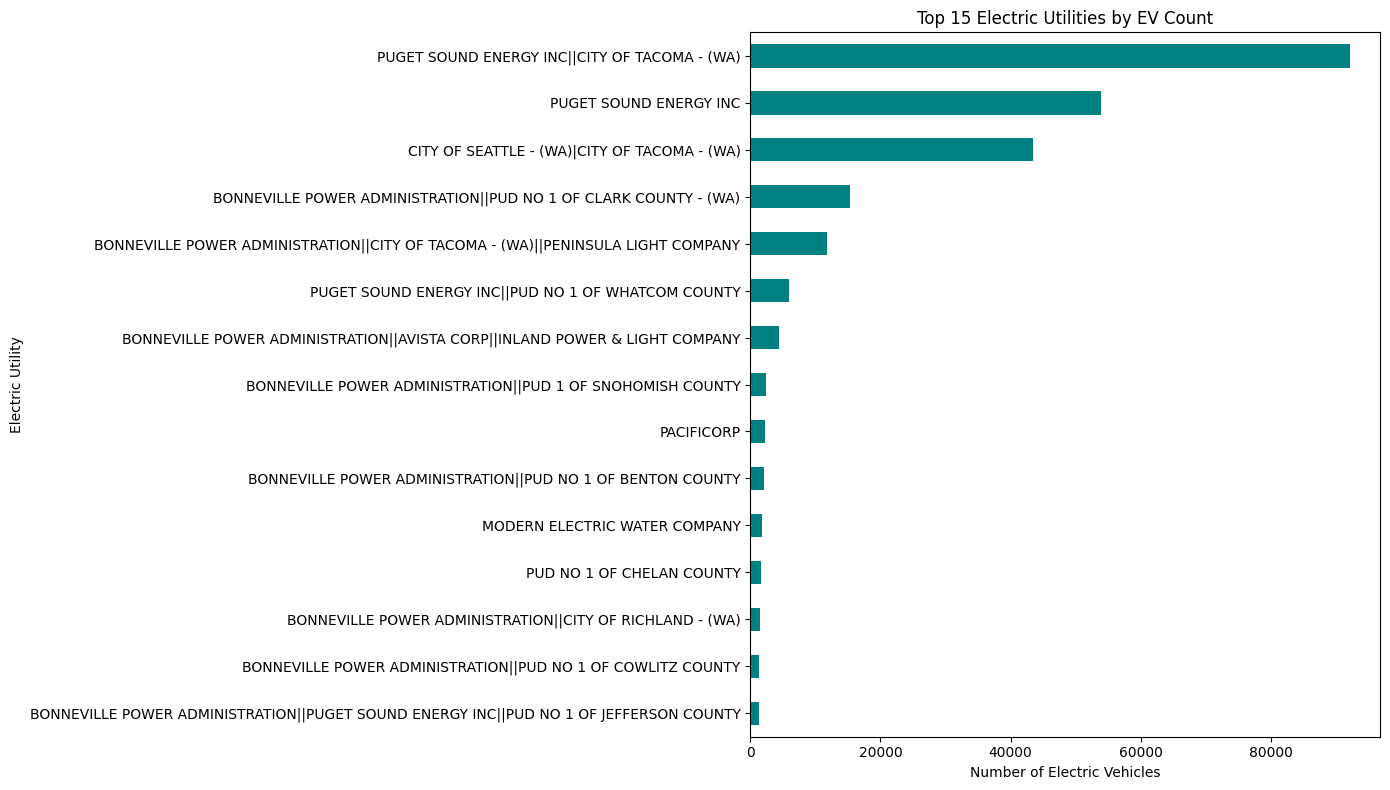


=== UTILITY MARKET SHARE (TOP 15) ===
PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA): 35.77%
PUGET SOUND ENERGY INC: 20.89%
CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA): 16.88%
BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF CLARK COUNTY - (WA): 5.93%
BONNEVILLE POWER ADMINISTRATION||CITY OF TACOMA - (WA)||PENINSULA LIGHT COMPANY: 4.59%
PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM COUNTY: 2.31%
BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||INLAND POWER & LIGHT COMPANY: 1.72%
BONNEVILLE POWER ADMINISTRATION||PUD 1 OF SNOHOMISH COUNTY: 0.92%
PACIFICORP: 0.85%
BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF BENTON COUNTY: 0.79%
MODERN ELECTRIC WATER COMPANY: 0.69%
PUD NO 1 OF CHELAN COUNTY: 0.62%
BONNEVILLE POWER ADMINISTRATION||CITY OF RICHLAND - (WA): 0.55%
BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF COWLITZ COUNTY: 0.52%
BONNEVILLE POWER ADMINISTRATION||PUGET SOUND ENERGY INC||PUD NO 1 OF JEFFERSON COUNTY: 0.5%


In [24]:
# Electric Utility analysis
print("=== ELECTRIC UTILITY ANALYSIS ===")
utility_counts = df_clean['Electric Utility'].value_counts().head(15)
print("Top 15 Electric Utilities:")
print(utility_counts)

# Visualize top utilities
plt.figure(figsize=(14, 8))
utility_counts.plot(kind='barh', color='teal')
plt.title('Top 15 Electric Utilities by EV Count')
plt.xlabel('Number of Electric Vehicles')
plt.ylabel('Electric Utility')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Utility market share
utility_market_share = (utility_counts / len(df_clean) * 100).round(2)
print("\n=== UTILITY MARKET SHARE (TOP 15) ===")
for utility, share in utility_market_share.items():
    print(f"{utility}: {share}%")

## 13. Correlation Analysis

=== CORRELATION ANALYSIS ===
Correlation Matrix:
                Model Year  Electric Range  Base MSRP  Vehicle Age
Model Year           1.000           -0.54     -0.216       -1.000
Electric Range      -0.540            1.00      0.110        0.540
Base MSRP           -0.216            0.11      1.000        0.216
Vehicle Age         -1.000            0.54      0.216        1.000


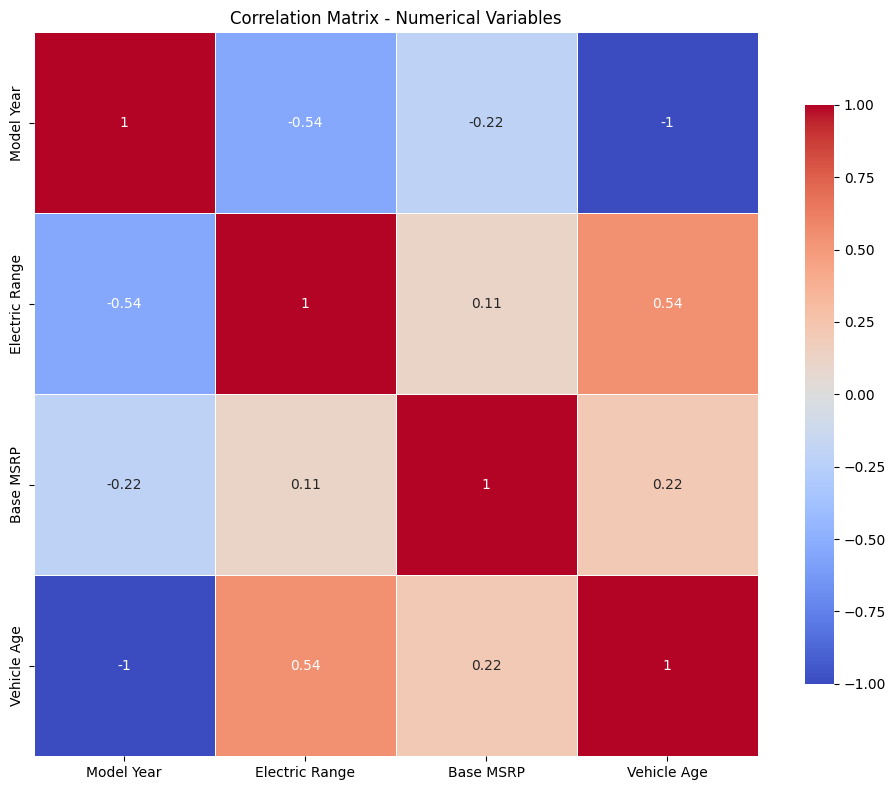

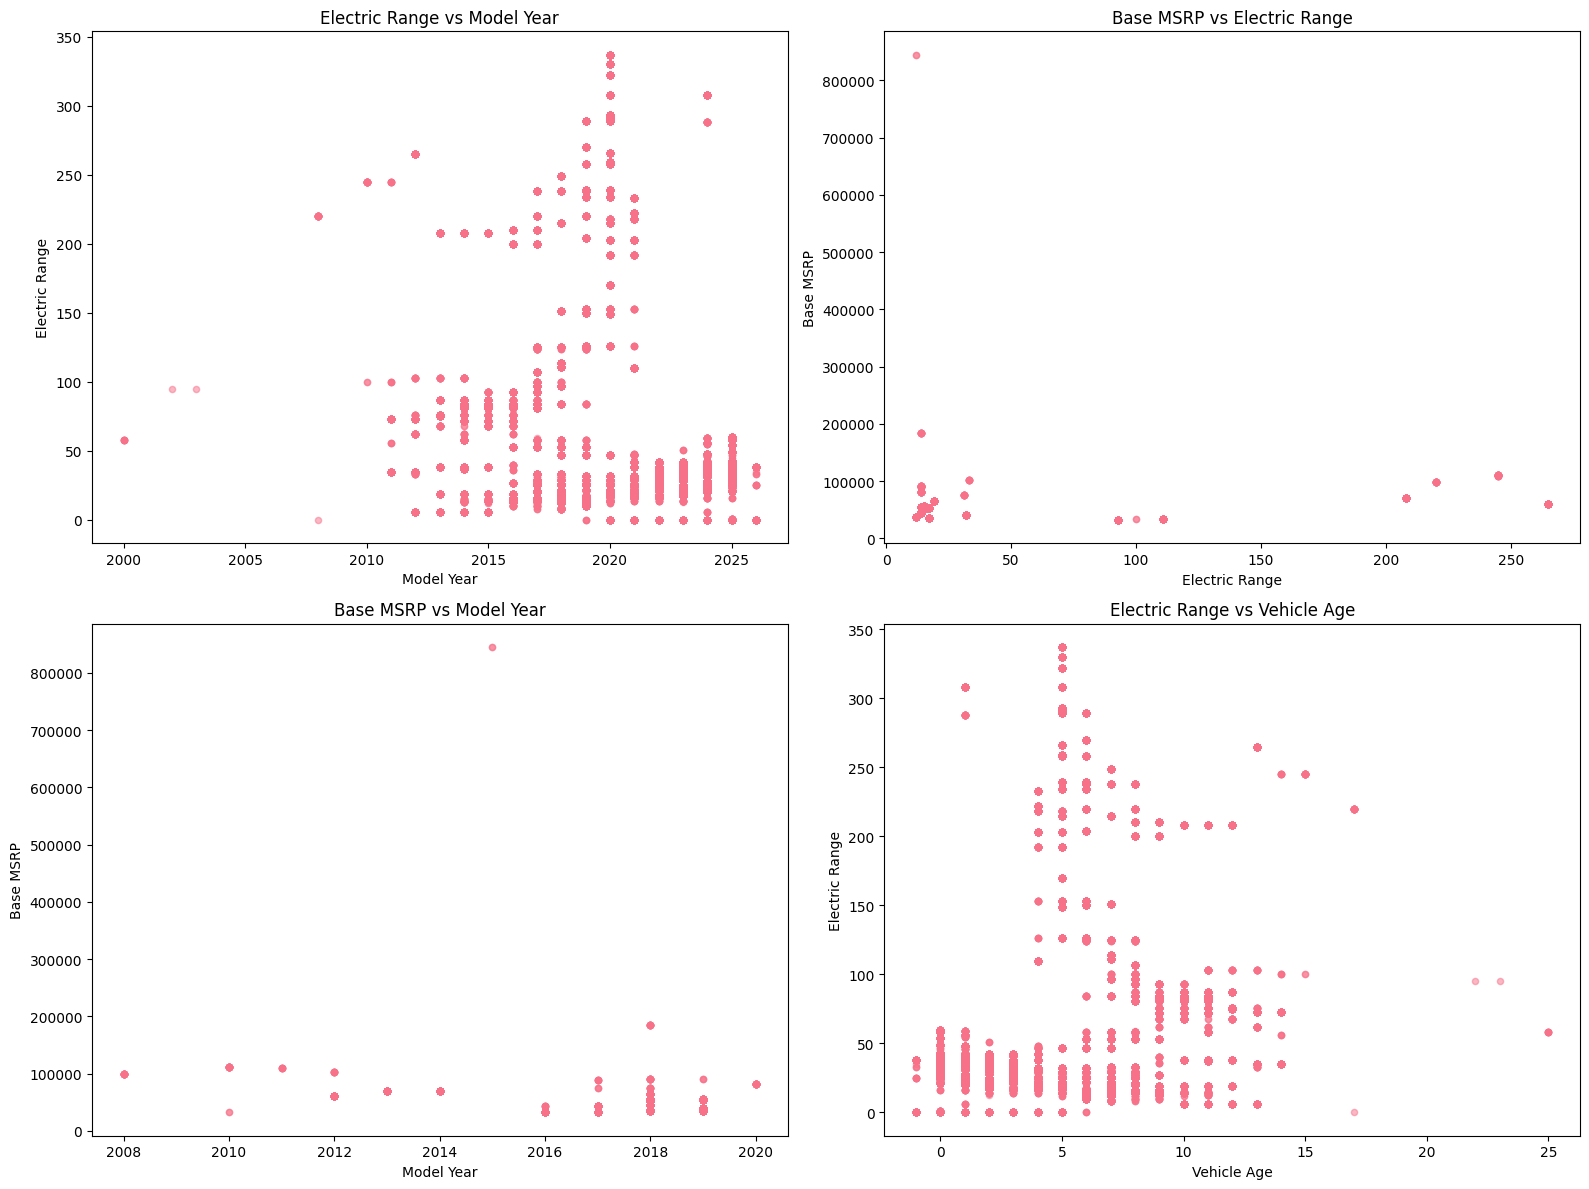

In [25]:
# Correlation analysis for numerical variables
print("=== CORRELATION ANALYSIS ===")
numerical_cols = ['Model Year', 'Electric Range', 'Base MSRP', 'Vehicle Age']
correlation_data = df_clean[numerical_cols].corr()

print("Correlation Matrix:")
print(correlation_data.round(3))

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_data, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix - Numerical Variables')
plt.tight_layout()
plt.show()

# Scatter plots for key relationships
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Range vs Model Year
df_clean.plot.scatter(x='Model Year', y='Electric Range', alpha=0.5, ax=ax1)
ax1.set_title('Electric Range vs Model Year')

# MSRP vs Range (excluding zeros)
msrp_range_data = df_clean[(df_clean['Base MSRP'] > 0) & (df_clean['Electric Range'] > 0)]
msrp_range_data.plot.scatter(x='Electric Range', y='Base MSRP', alpha=0.5, ax=ax2)
ax2.set_title('Base MSRP vs Electric Range')

# MSRP vs Model Year
msrp_year_data = df_clean[df_clean['Base MSRP'] > 0]
msrp_year_data.plot.scatter(x='Model Year', y='Base MSRP', alpha=0.5, ax=ax3)
ax3.set_title('Base MSRP vs Model Year')

# Vehicle Age vs Range
df_clean.plot.scatter(x='Vehicle Age', y='Electric Range', alpha=0.5, ax=ax4)
ax4.set_title('Electric Range vs Vehicle Age')

plt.tight_layout()
plt.show()

## 14. Advanced Insights and Trends

=== MARKET PENETRATION ANALYSIS ===
Top 10 counties with highest EV adoption:
County
King         128272
Snohomish     31810
Pierce        21314
Clark         15653
Thurston       9344
Kitsap         8651
Spokane        7247
Whatcom        6297
Benton         3469
Skagit         3015
Name: count, dtype: int64

EV adoption in recent years (2018+):
Model Year
2018    14548
2019    11058
2020    12348
2021    20858
2022    29519
2023    60042
2024    50817
2025    26389
2026     3867
Name: count, dtype: int64


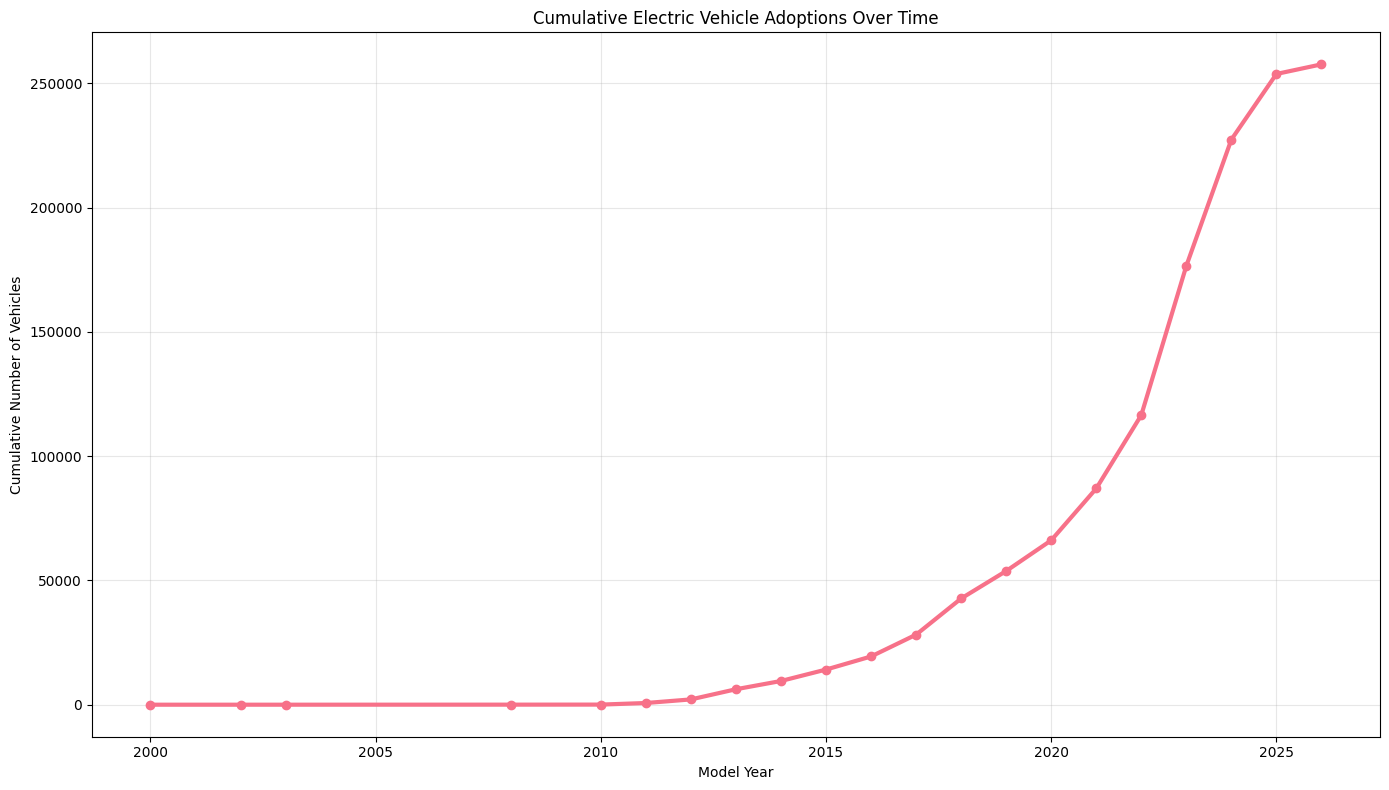

In [26]:
# Market penetration by county (top 10 counties)
print("=== MARKET PENETRATION ANALYSIS ===")
top_counties = county_counts.head(10)
print("Top 10 counties with highest EV adoption:")
print(top_counties)

# EV adoption rate by model year (recent years)
recent_adoption = df_clean[df_clean['Model Year'] >= 2018]['Model Year'].value_counts().sort_index()
print("\nEV adoption in recent years (2018+):")
print(recent_adoption)

# Calculate cumulative adoptions
cumulative_adoption = year_counts.cumsum()
plt.figure(figsize=(14, 8))
cumulative_adoption.plot(kind='line', marker='o', linewidth=3, markersize=6)
plt.title('Cumulative Electric Vehicle Adoptions Over Time')
plt.xlabel('Model Year')
plt.ylabel('Cumulative Number of Vehicles')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

=== BRAND EVOLUTION OVER TIME ===


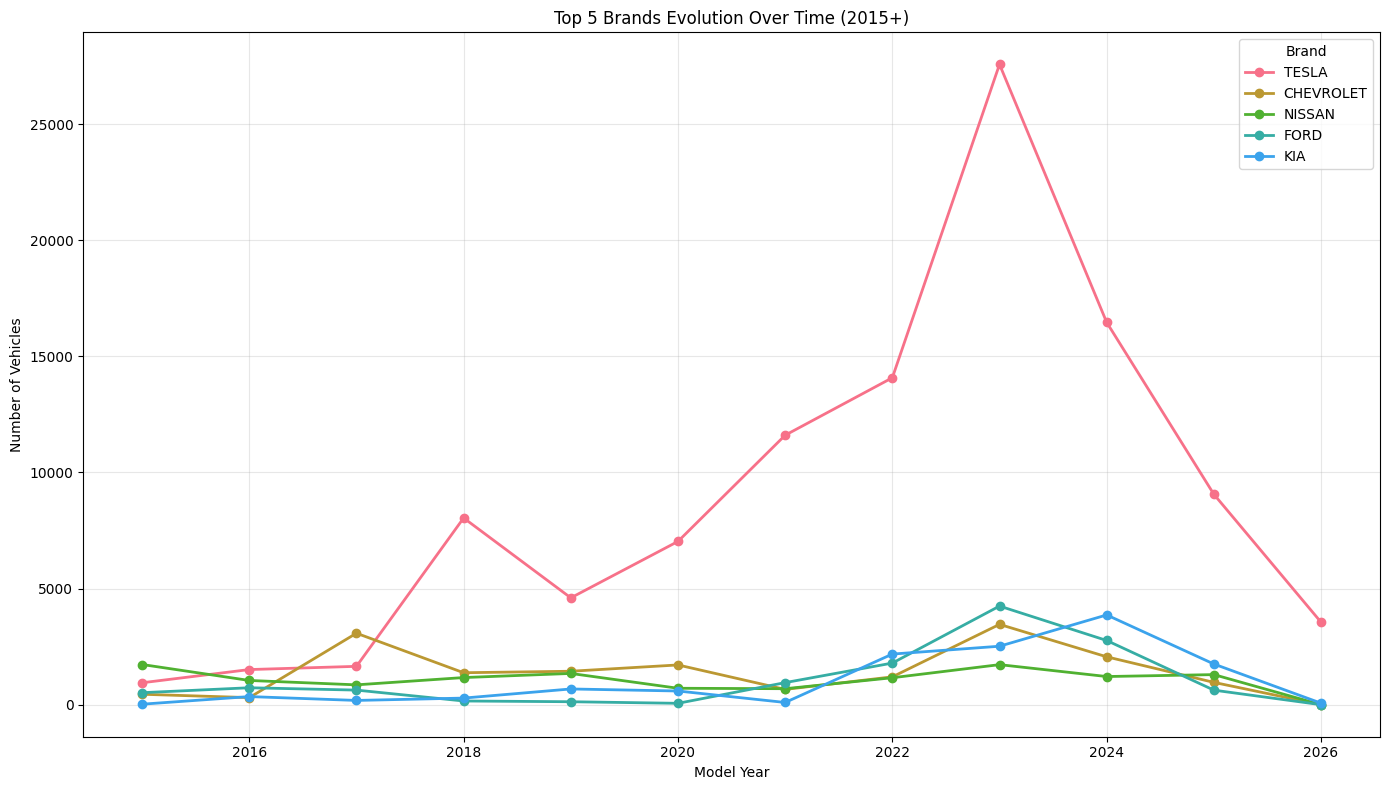

In [27]:
# Brand loyalty and market evolution
print("=== BRAND EVOLUTION OVER TIME ===")
top_5_makes = make_counts.head(5).index
brand_evolution = df_clean[df_clean['Make'].isin(top_5_makes)].groupby(['Model Year', 'Make']).size().unstack(fill_value=0)

# Plot brand evolution for recent years
recent_brand_evolution = brand_evolution.loc[brand_evolution.index >= 2015]
plt.figure(figsize=(14, 8))
for brand in top_5_makes:
    if brand in recent_brand_evolution.columns:
        recent_brand_evolution[brand].plot(kind='line', marker='o', linewidth=2, label=brand)

plt.title('Top 5 Brands Evolution Over Time (2015+)')
plt.xlabel('Model Year')
plt.ylabel('Number of Vehicles')
plt.legend(title='Brand')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

=== RANGE IMPROVEMENT BY MANUFACTURER ===


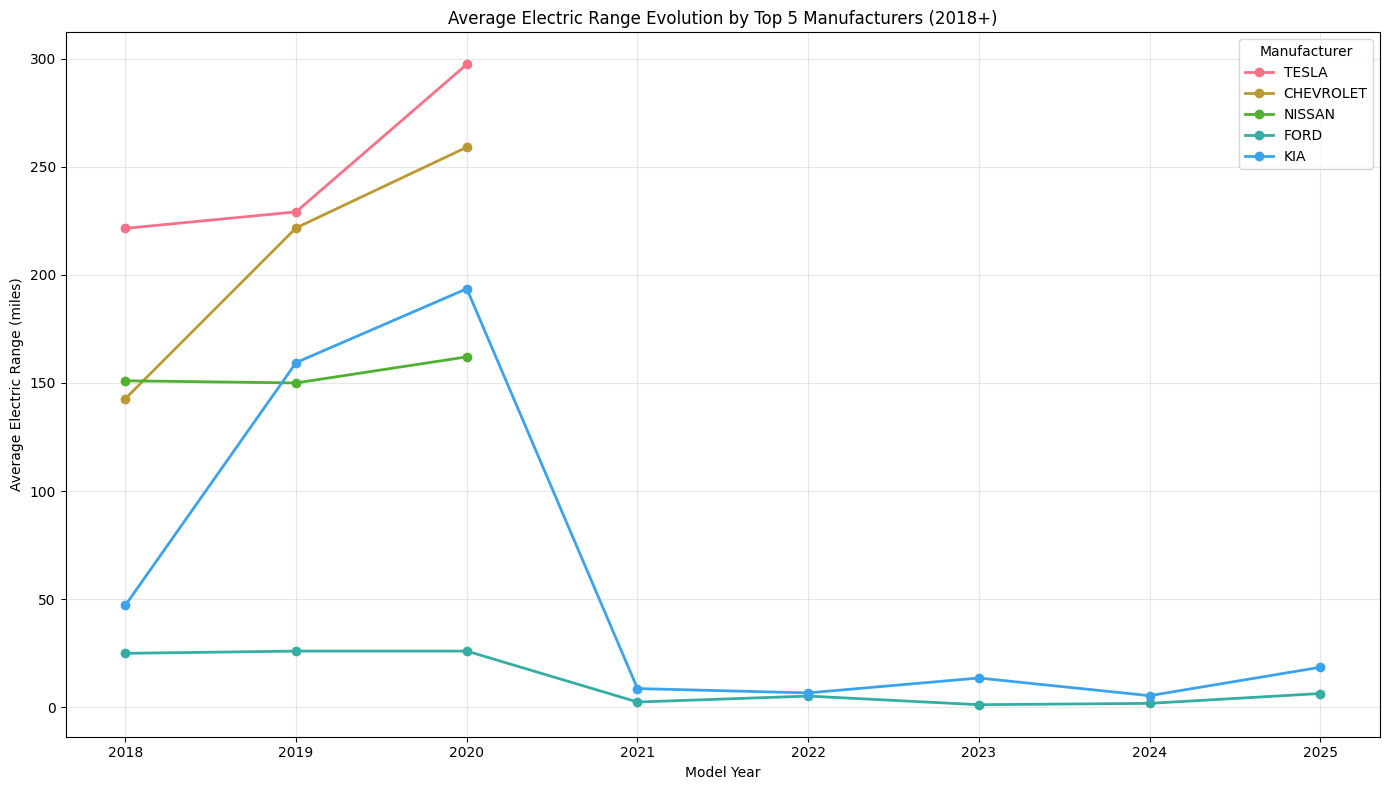

In [28]:
# Range improvement analysis by manufacturer
print("=== RANGE IMPROVEMENT BY MANUFACTURER ===")
range_by_make_year = df_clean[df_clean['Make'].isin(top_5_makes)].groupby(['Make', 'Model Year'])['Electric Range'].mean().unstack(fill_value=0)

# Calculate range improvement for recent years
recent_years_range_make = range_by_make_year.loc[:, range_by_make_year.columns >= 2018]
plt.figure(figsize=(14, 8))

for make in top_5_makes:
    if make in recent_years_range_make.index:
        make_data = recent_years_range_make.loc[make]
        make_data = make_data[make_data > 0]  # Remove zero values
        if len(make_data) > 1:
            make_data.plot(kind='line', marker='o', linewidth=2, label=make)

plt.title('Average Electric Range Evolution by Top 5 Manufacturers (2018+)')
plt.xlabel('Model Year')
plt.ylabel('Average Electric Range (miles)')
plt.legend(title='Manufacturer')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 15. Key Findings Summary

In [29]:
# Generate comprehensive summary statistics
print("=== COMPREHENSIVE EV MARKET ANALYSIS SUMMARY ===")
print(f"Total Electric Vehicles Analyzed: {len(df_clean):,}")
print(f"Analysis Period: {df_clean['Model Year'].min():.0f} - {df_clean['Model Year'].max():.0f}")
print(f"Geographic Coverage: {df_clean['State'].nunique()} states, {df_clean['County'].nunique()} counties, {df_clean['City'].nunique()} cities")

print("\n=== EV TYPE BREAKDOWN ===")
for ev_type, count in ev_type_counts.items():
    pct = count / len(df_clean) * 100
    print(f"{ev_type}: {count:,} vehicles ({pct:.1f}%)")

print("\n=== TOP MARKET LEADERS ===")
print(f"Leading State: {df_clean['State'].mode().iloc[0]} ({df_clean['State'].value_counts().iloc[0]:,} vehicles)")
print(f"Leading County: {county_counts.index[0]} ({county_counts.iloc[0]:,} vehicles)")
print(f"Leading City: {city_counts.index[0]} ({city_counts.iloc[0]:,} vehicles)")
print(f"Leading Manufacturer: {make_counts.index[0]} ({make_counts.iloc[0]:,} vehicles, {make_counts.iloc[0]/len(df_clean)*100:.1f}% market share)")
print(f"Most Popular Model: {model_counts.index[0]} ({model_counts.iloc[0]:,} vehicles)")

print("\n=== TECHNICAL SPECIFICATIONS ===")
print(f"Average Electric Range: {df_clean['Electric Range'].mean():.1f} miles")
print(f"Median Electric Range: {df_clean['Electric Range'].median():.1f} miles")
if len(msrp_nonzero) > 0:
    print(f"Average MSRP (excluding zeros): ${msrp_nonzero.mean():,.0f}")
    print(f"Median MSRP (excluding zeros): ${msrp_nonzero.median():,.0f}")

print("\n=== GROWTH TRENDS ===")
recent_years = year_counts.tail(5)
total_recent = recent_years.sum()
print(f"Vehicles registered in last 5 years: {total_recent:,} ({total_recent/len(df_clean)*100:.1f}% of total)")

if len(recent_years) >= 2:
    latest_growth = ((recent_years.iloc[-1] - recent_years.iloc[-2]) / recent_years.iloc[-2] * 100)
    print(f"Latest year-over-year growth: {latest_growth:+.1f}%")

print("\n=== CAFV ELIGIBILITY ===")
cafv_eligible = df_clean[df_clean['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].str.contains('eligible', case=False, na=False)]
print(f"CAFV Eligible Vehicles: {len(cafv_eligible):,} ({len(cafv_eligible)/len(df_clean)*100:.1f}%)")

print("\n=== INFRASTRUCTURE ===")
print(f"Electric Utilities Serving EVs: {df_clean['Electric Utility'].nunique()}")
print(f"Top Utility: {utility_counts.index[0]} ({utility_counts.iloc[0]:,} vehicles)")

=== COMPREHENSIVE EV MARKET ANALYSIS SUMMARY ===
Total Electric Vehicles Analyzed: 257,635
Analysis Period: 2000 - 2026
Geographic Coverage: 50 states, 226 counties, 830 cities

=== EV TYPE BREAKDOWN ===
Battery Electric Vehicle (BEV): 205,095 vehicles (79.6%)
Plug-in Hybrid Electric Vehicle (PHEV): 52,540 vehicles (20.4%)

=== TOP MARKET LEADERS ===
Leading State: WA (257,038 vehicles)
Leading County: King (128,272 vehicles)
Leading City: Seattle (40,534 vehicles)
Leading Manufacturer: TESLA (107,535 vehicles, 41.7% market share)
Most Popular Model: MODEL Y (53,560 vehicles)

=== TECHNICAL SPECIFICATIONS ===
Average Electric Range: 43.1 miles
Median Electric Range: 0.0 miles
Average MSRP (excluding zeros): $57,174
Median MSRP (excluding zeros): $57,800

=== GROWTH TRENDS ===
Vehicles registered in last 5 years: 170,634 (66.2% of total)
Latest year-over-year growth: -85.3%

=== CAFV ELIGIBILITY ===
CAFV Eligible Vehicles: 99,965 (38.8%)

=== INFRASTRUCTURE ===
Electric Utilities Servin

## Conclusion

This comprehensive analysis of the Electric Vehicle Population dataset reveals several key insights:

### Key Takeaways:
1. **Market Growth**: The EV market shows strong growth trends with significant adoption in recent years
2. **Geographic Concentration**: EV adoption is concentrated in specific states, counties, and cities
3. **Technology Evolution**: Electric range capabilities have improved over time across manufacturers
4. **Market Leaders**: Certain manufacturers dominate the market with specific models leading adoption
5. **Infrastructure**: Multiple utility companies are supporting EV infrastructure development

### Business Implications:
- **Market Opportunities**: Identify underserved geographic areas for expansion
- **Product Development**: Focus on range improvements and competitive pricing
- **Infrastructure Planning**: Support utility partnerships in high-adoption areas
- **Policy Impact**: CAFV eligibility significantly influences adoption patterns

### Recommendations:
1. Continue monitoring growth trends and market penetration
2. Analyze infrastructure needs in high-adoption areas
3. Study the correlation between range, pricing, and adoption
4. Investigate regional factors influencing EV adoption
5. Track manufacturer strategies and market positioning

This analysis provides a solid foundation for understanding the electric vehicle market landscape and can inform strategic decisions for stakeholders in the EV ecosystem.